<a href="https://colab.research.google.com/github/Sambhaji6529/Bioaassay---Project/blob/main/Bioaassay_comp14_AID746AID1284_Red_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1=pd.read_csv("/content/drive/MyDrive/AID746AID1284red_test.csv")
df2=pd.read_csv("/content/drive/MyDrive/AID746AID1284red_train.csv")

In [ ]:
df1.shape

(11956, 155)

In [ ]:
df2.shape

(47828, 155)

In [ ]:
df=pd.concat([df1,df2],axis=0,ignore_index=True)

In [ ]:
df.head()

NEG_01_NEG  NEG_02_NEG  NEG_03_NEG  NEG_04_NEG  NEG_05_NEG  NEG_06_NEG  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   NEG_07_NEG  NEG_03_POS  NEG_04_POS  NEG_05_POS  ...  WBN_LP_H_1.00  XLogP  \
0           0           0           0           0  ...        3.60912  3.363   
1           0           0           0           0  ...        3.73406  1.770   
2           0           0           0           0  ...        3.84241  2.964   
3           0           0           0           0  ...        3.50705  0.470   
4           0           0           0           0  ...        3.95624  0.357   

      PSA  NumRot  NumHBA  NumHBD       MW  BBB  BadGroup  Outcome  
0   87.74       9       7       2  409.486    0         0   Active  
1   66.76       6       5       0  382.210    1         1   Active  
2  103.79       9       6       2  382.416    0         0   Active  
3  128.12       8       7       2  350.396    0         0   Active  
4  188.86       8       5       2  434.568    0         1   Active  

[5 rows x 155 columns]

In [ ]:
df.tail()

NEG_01_NEG  NEG_02_NEG  NEG_03_NEG  NEG_04_NEG  NEG_05_NEG  NEG_06_NEG  \
59779           0           0           0           0           0           0   
59780           0           0           0           0           0           0   
59781           0           0           0           0           0           0   
59782           0           0           0           0           0           0   
59783           0           0           0           0           0           0   

       NEG_07_NEG  NEG_03_POS  NEG_04_POS  NEG_05_POS  ...  WBN_LP_H_1.00  \
59779           0           0           0           0  ...        3.58104   
59780           0           0           0           0  ...        3.57720   
59781           0           0           0           0  ...        3.66586   
59782           0           0           0           0  ...        3.38438   
59783           0           0           0           0  ...        3.62355   

       XLogP    PSA  NumRot  NumHBA  NumHBD       MW  BBB  BadGroup   Outcome  
59779  2.676  59.59       4       5       2  296.326    1         0  Inactive  
59780  2.226  54.60       1       3       1  302.333    1         1  Inactive  
59781  3.311  61.28       4       3       2  318.380    1         0  Inactive  
59782  0.204  79.12       3       4       1  233.296    0         0  Inactive  
59783  2.214  92.34       4       6       1  300.270    0         1  Inactive  

[5 rows x 155 columns]

In [ ]:
df.shape

(59784, 155)

In [ ]:
numeric_columns=df.describe().columns
numeric_columns

Index(['NEG_01_NEG', 'NEG_02_NEG', 'NEG_03_NEG', 'NEG_04_NEG', 'NEG_05_NEG',
       'NEG_06_NEG', 'NEG_07_NEG', 'NEG_03_POS', 'NEG_04_POS', 'NEG_05_POS',
       ...
       'WBN_LP_L_1.00', 'WBN_LP_H_1.00', 'XLogP', 'PSA', 'NumRot', 'NumHBA',
       'NumHBD', 'MW', 'BBB', 'BadGroup'],
      dtype='object', length=154)

In [ ]:
categorical_columns=df.describe(include="O").columns
categorical_columns

Index(['Outcome'], dtype='object')

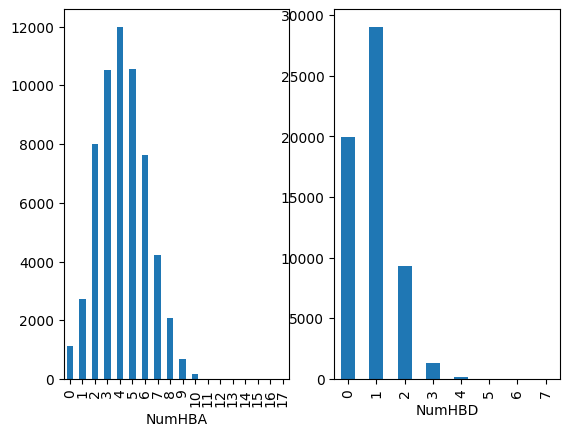

In [ ]:
a = [df["NumHBA"], df["NumHBD"]]
for i, col in enumerate(a):
    plt.subplot(1, 2,i+1)
    df.groupby(col).size().plot(kind="bar")
plt.show()

In [ ]:
df.isnull().sum()

NEG_01_NEG    0
NEG_02_NEG    0
NEG_03_NEG    0
NEG_04_NEG    0
NEG_05_NEG    0
             ..
NumHBD        0
MW            0
BBB           0
BadGroup      0
Outcome       0
Length: 155, dtype: int64

In [ ]:
df["Outcome"].value_counts()

Inactive    59727
Active         57
Name: Outcome, dtype: int64

In [ ]:
X1=df.drop(["Outcome"],axis=1)

<Axes: xlabel='PSA', ylabel='Density'>

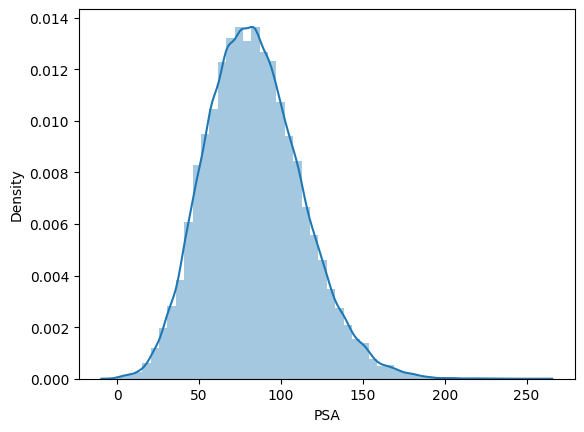

In [ ]:
sns.distplot(df["PCA"])

In [ ]:
X=df.drop("Outcome",axis=1)
y=df["Outcome"]

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_sample,y_sample=smote.fit_resample(X,y)

<Axes: xlabel='PSA', ylabel='Density'>

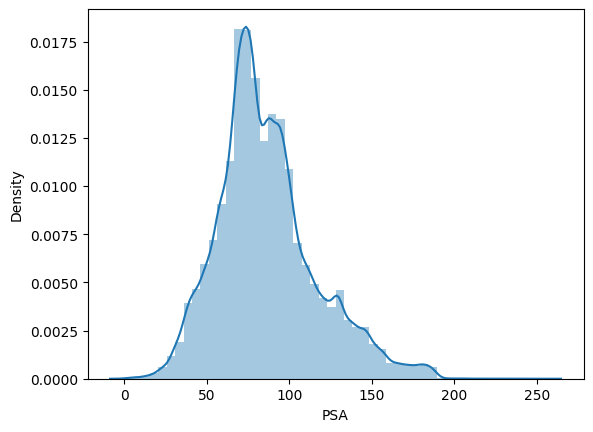

In [ ]:
sns.distplot(X_sample["PSA"])

In [ ]:
X_sample.describe()

NEG_01_NEG     NEG_02_NEG     NEG_03_NEG     NEG_04_NEG  \
count  119454.000000  119454.000000  119454.000000  119454.000000   
mean        0.000201       0.001917       0.000134       0.000636   
std         0.014173       0.043742       0.011573       0.025216   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

          NEG_05_NEG     NEG_06_NEG     NEG_07_NEG     NEG_03_POS  \
count  119454.000000  119454.000000  119454.000000  119454.000000   
mean        0.000276       0.000176       0.000117       0.000260   
std         0.016619       0.013258       0.010825       0.016107   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

          NEG_04_POS     NEG_05_POS  ...  WBN_LP_L_1.00  WBN_LP_H_1.00  \
count  119454.000000  119454.000000  ...  119454.000000  119454.000000   
mean        0.000779       0.000301  ...      -3.297419       3.708951   
std         0.027892       0.017358  ...       0.251813       0.202222   
min         0.000000       0.000000  ...      -3.882950       1.961380   
25%         0.000000       0.000000  ...      -3.541009       3.579989   
50%         0.000000       0.000000  ...      -3.251295       3.687121   
75%         0.000000       0.000000  ...      -3.090940       3.863729   
max         1.000000       1.000000  ...      -2.042500       4.457050   

               XLogP            PSA         NumRot         NumHBA  \
count  119454.000000  119454.000000  119454.000000  119454.000000   
mean        2.541222      86.386037       5.447084       4.359837   
std         1.098141      30.078967       2.513162       1.823071   
min        -3.366000       0.000000       0.000000       0.000000   
25%         1.857241      67.230000       4.000000       3.000000   
50%         2.622823      81.676730       6.000000       4.000000   
75%         3.177000     101.240960       7.000000       6.000000   
max         8.314000     255.980000      20.000000      17.000000   

              NumHBD             MW            BBB       BadGroup  
count  119454.000000  119454.000000  119454.000000  119454.000000  
mean        0.880992     347.057551       0.233839       0.112219  
std         0.728046      71.904990       0.423273       0.348775  
min         0.000000     122.131000       0.000000       0.000000  
25%         0.000000     289.766000       0.000000       0.000000  
50%         1.000000     351.336000       0.000000       0.000000  
75%         1.000000     404.893918       0.000000       0.000000  
max         7.000000     914.186000       1.000000       4.000000  

[8 rows x 154 columns]

In [ ]:
df.describe()

NEG_01_NEG    NEG_02_NEG    NEG_03_NEG    NEG_04_NEG    NEG_05_NEG  \
count  59784.000000  59784.000000  59784.000000  59784.000000  59784.000000   
mean       0.000401      0.003830      0.000268      0.001271      0.000552   
std        0.020032      0.061773      0.016357      0.035632      0.023488   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

         NEG_06_NEG    NEG_07_NEG    NEG_03_POS    NEG_04_POS    NEG_05_POS  \
count  59784.000000  59784.000000  59784.000000  59784.000000  59784.000000   
mean       0.000351      0.000234      0.000519      0.001556      0.000602   
std        0.018739      0.015301      0.022766      0.039411      0.024532   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       ...  WBN_LP_L_1.00  WBN_LP_H_1.00         XLogP           PSA  \
count  ...   59784.000000   59784.000000  59784.000000  59784.000000   
mean   ...      -3.270865       3.684774      2.660818     83.647321   
std    ...       0.269131       0.234122      1.318811     29.072753   
min    ...      -3.882950       1.961380     -3.366000      0.000000   
25%    ...      -3.547810       3.536520      1.803000     63.050000   
50%    ...      -3.207370       3.670090      2.672000     82.010000   
75%    ...      -3.041575       3.854423      3.533000    102.230000   
max    ...      -2.042500       4.457050      8.314000    255.980000   

             NumRot        NumHBA        NumHBD            MW           BBB  \
count  59784.000000  59784.000000  59784.000000  59784.000000  59784.000000   
mean       5.526830      4.204035      0.874883    345.633723      0.296752   
std        2.500613      1.919055      0.769096     72.816645      0.456830   
min        0.000000      0.000000      0.000000    122.131000      0.000000   
25%        4.000000      3.000000      0.000000    292.423000      0.000000   
50%        5.000000      4.000000      1.000000    343.471000      0.000000   
75%        7.000000      5.000000      1.000000    398.816000      1.000000   
max       20.000000     17.000000      7.000000    914.186000      1.000000   

           BadGroup  
count  59784.000000  
mean       0.192995  
std        0.446926  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        4.000000  

[8 rows x 154 columns]

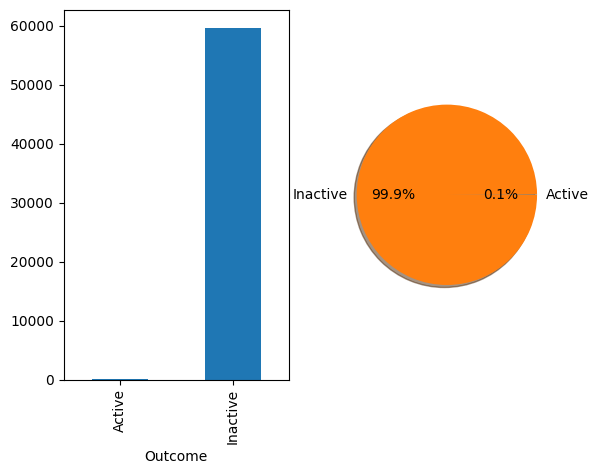

In [ ]:
plt.subplot(121)
df.groupby("Outcome").size().plot(kind="bar")
plt.subplot(122)
df.groupby("Outcome").size().plot(kind="pie",autopct='%1.1f%%',shadow=True)
plt.show()

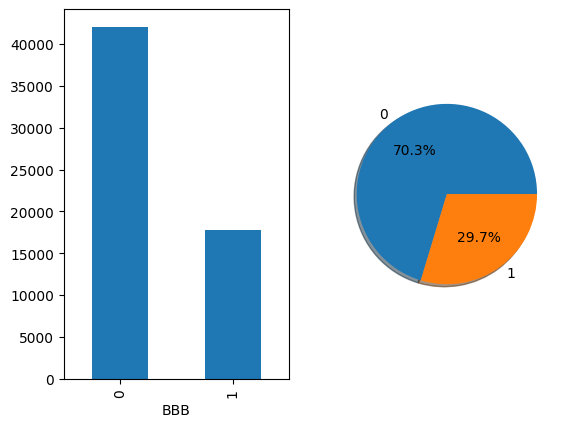

In [ ]:
plt.subplot(121)
df.groupby("BBB").size().plot(kind="bar")
plt.subplot(122)
df.groupby("BBB").size().plot(kind="pie",autopct='%1.1f%%',shadow=True)
plt.show()

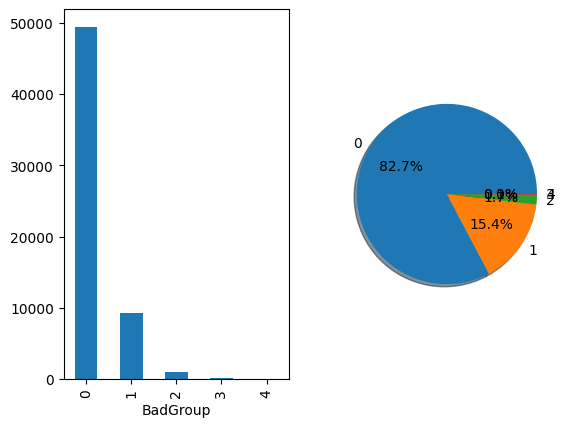

In [ ]:
plt.subplot(121)
df.groupby("BadGroup").size().plot(kind="bar")
plt.subplot(122)
df.groupby("BadGroup").size().plot(kind="pie",autopct='%1.1f%%',shadow=True)
plt.show()

In [ ]:
df.dtypes

NEG_01_NEG      int64
NEG_02_NEG      int64
NEG_03_NEG      int64
NEG_04_NEG      int64
NEG_05_NEG      int64
               ...   
NumHBD          int64
MW            float64
BBB             int64
BadGroup        int64
Outcome        object
Length: 155, dtype: object

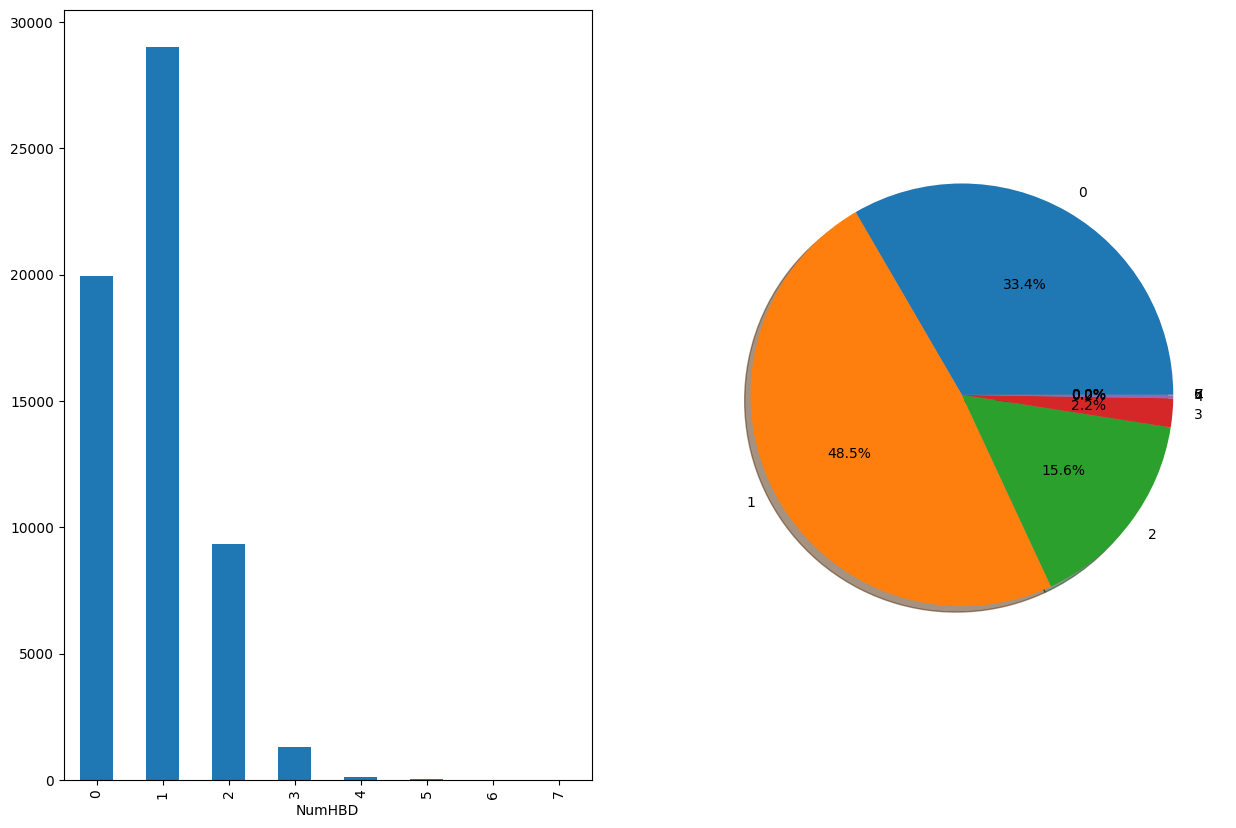

In [ ]:
plt.subplot(121)
df.groupby("NumHBD").size().plot(kind="bar")
plt.subplot(122)
df.groupby("NumHBD").size().plot(kind="pie",autopct='%1.1f%%',shadow=True,figsize=(15,10))
plt.show()

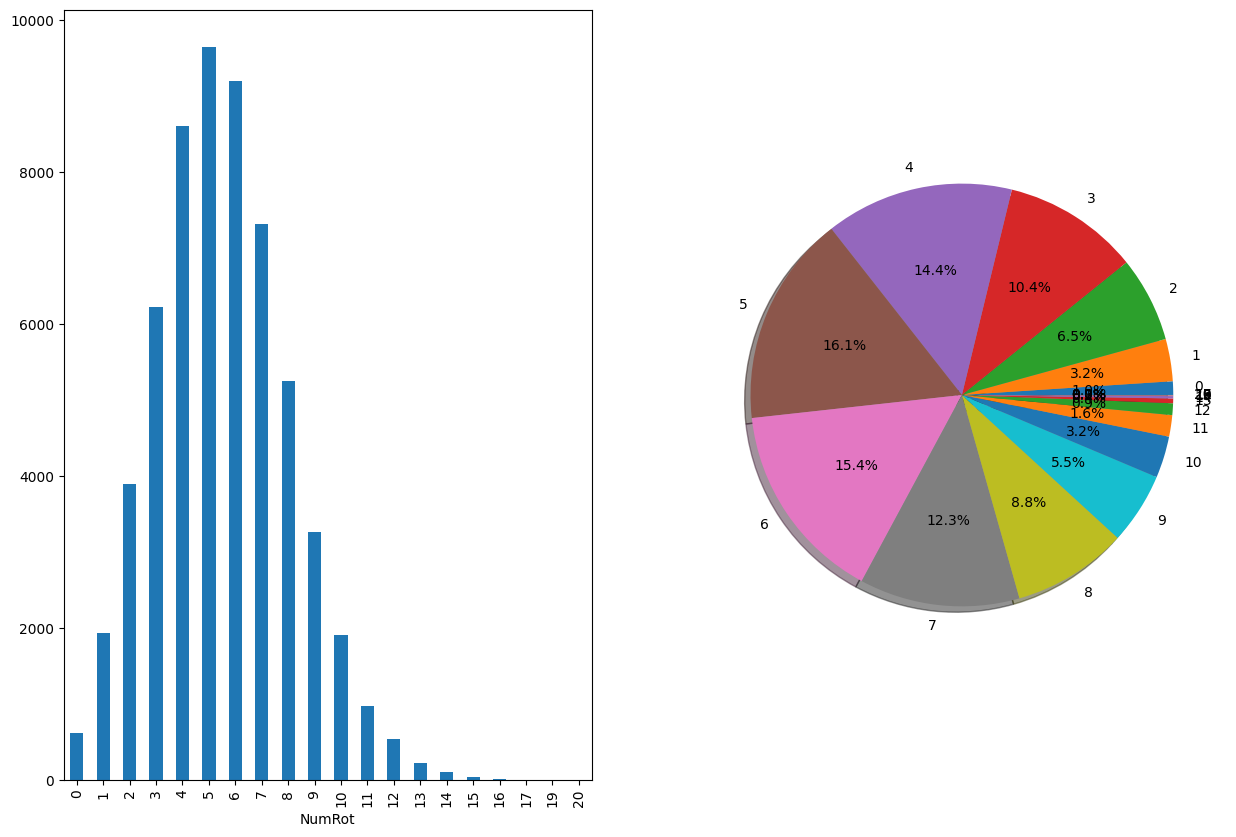

In [ ]:
plt.subplot(121)
df.groupby("NumRot").size().plot(kind="bar")
plt.subplot(122)
df.groupby("NumRot").size().plot(kind="pie",autopct='%1.1f%%',shadow=True,figsize=(15,10))
plt.show()

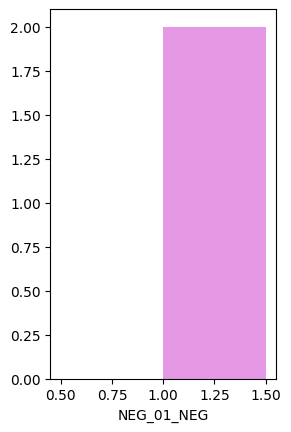

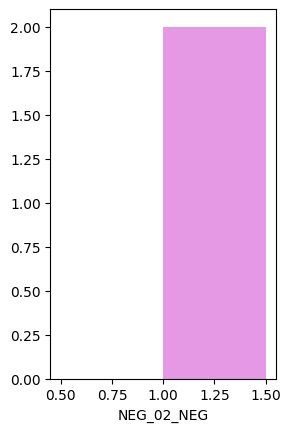

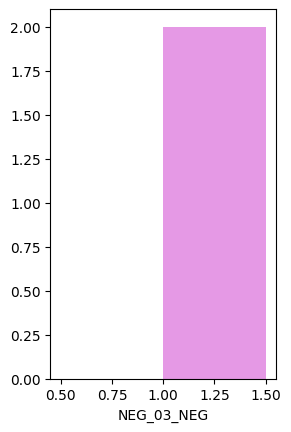

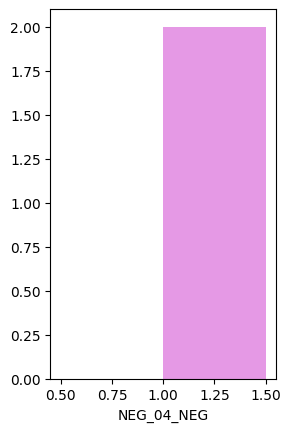

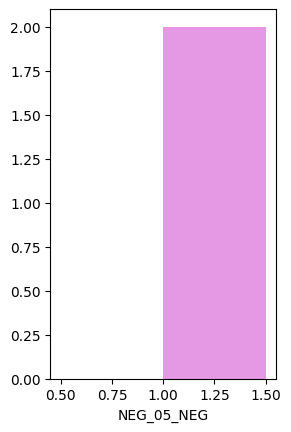

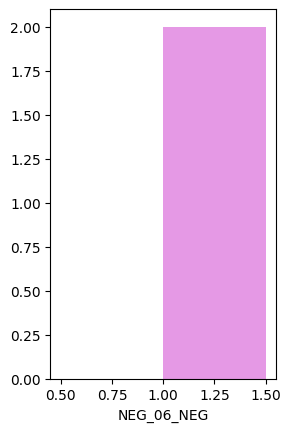

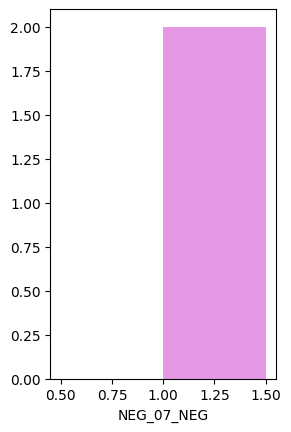

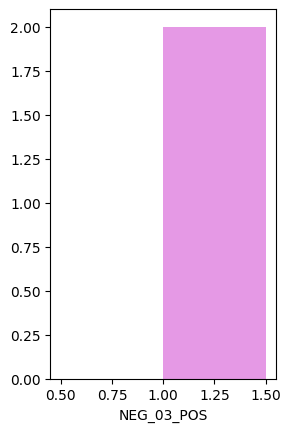

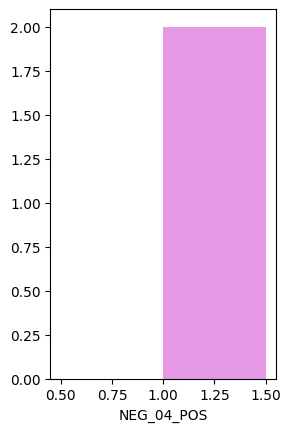

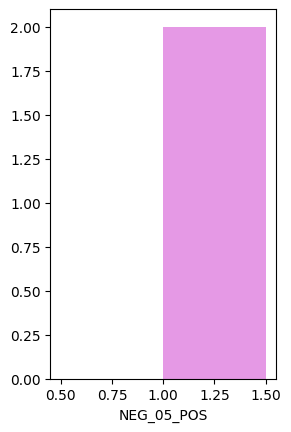

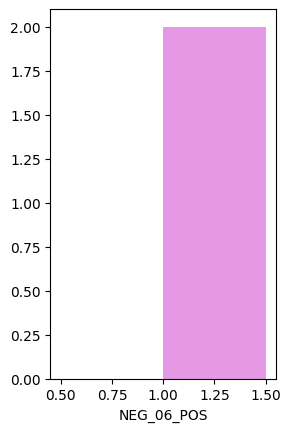

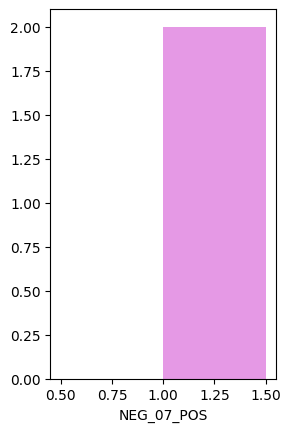

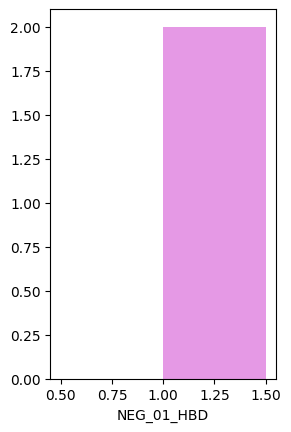

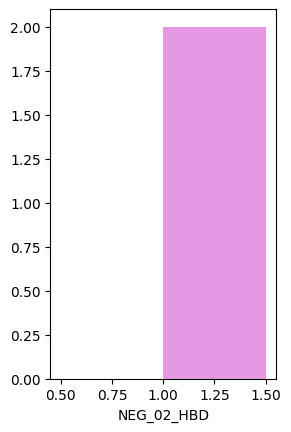

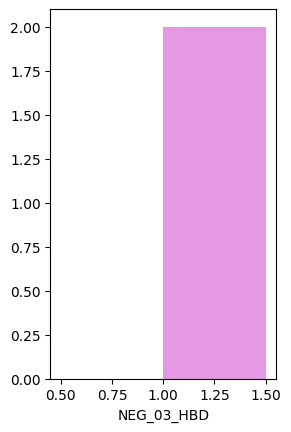

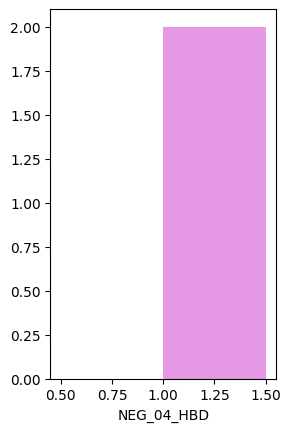

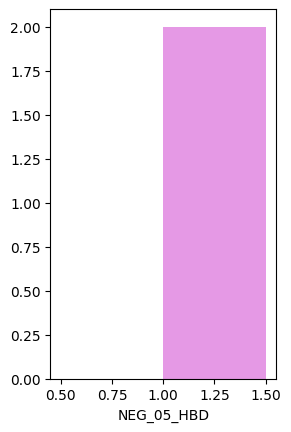

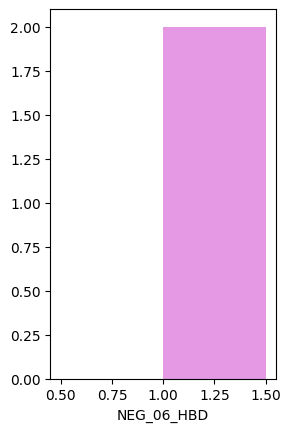

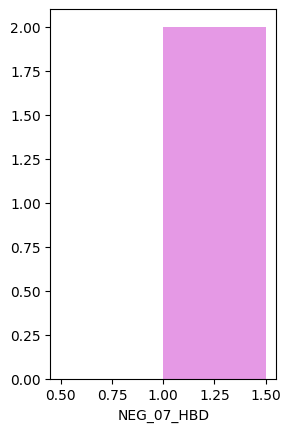

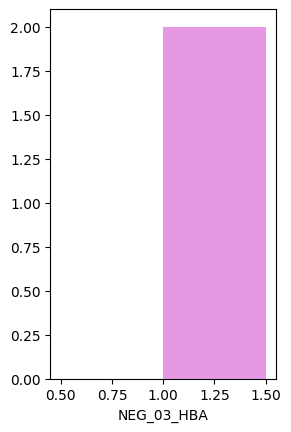

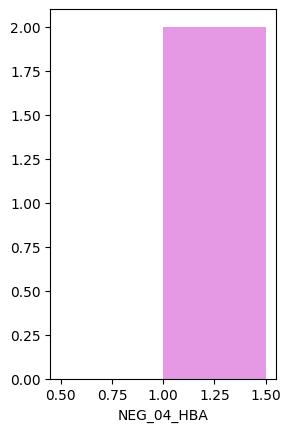

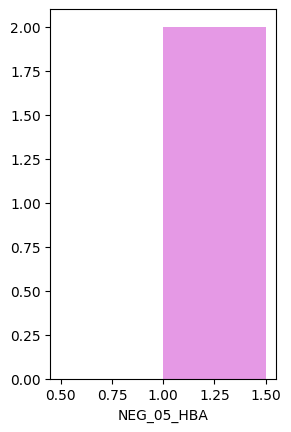

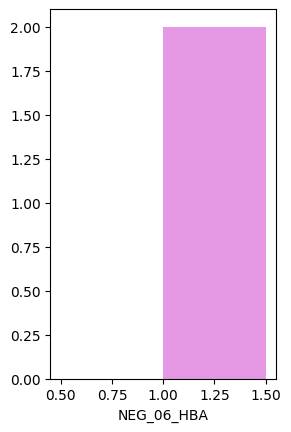

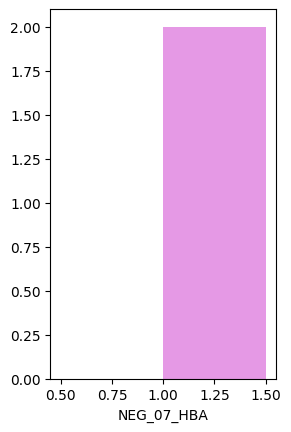

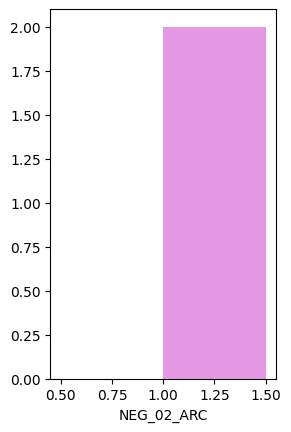

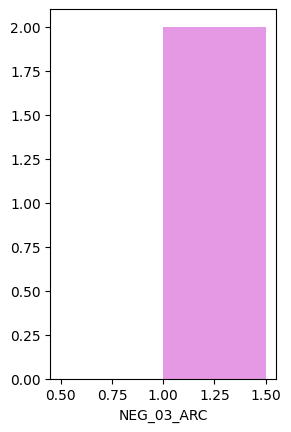

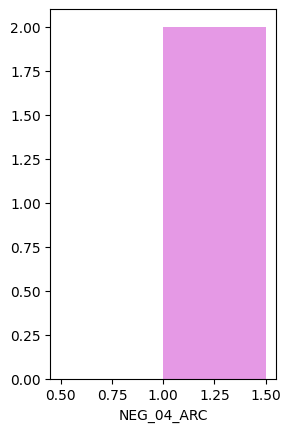

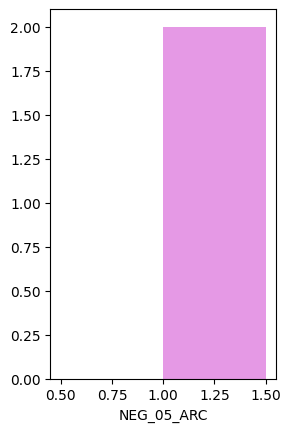

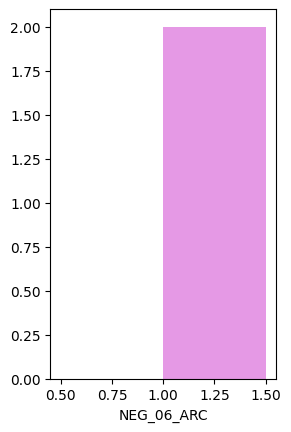

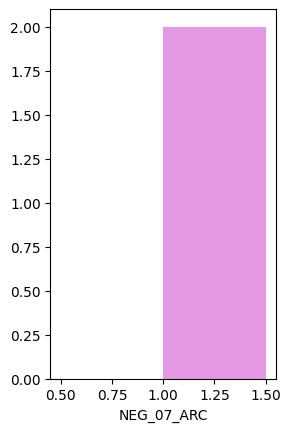

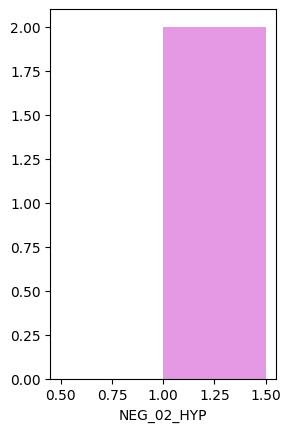

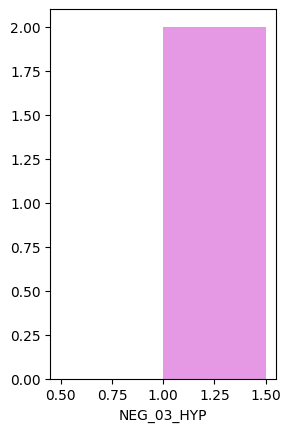

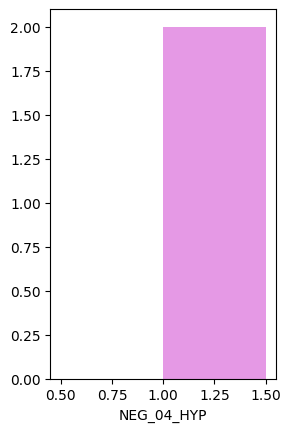

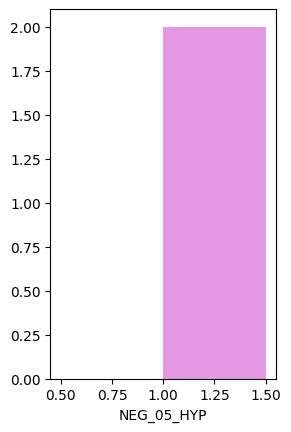

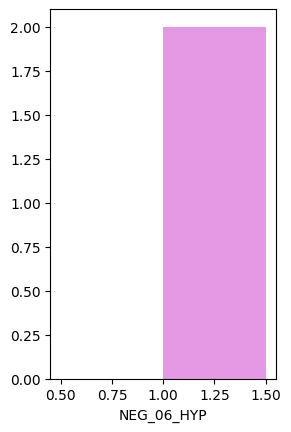

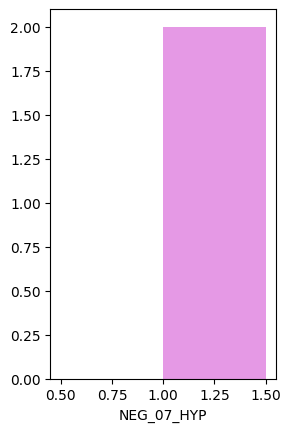

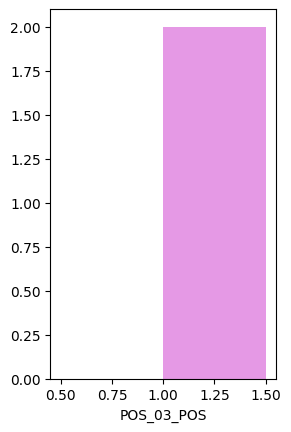

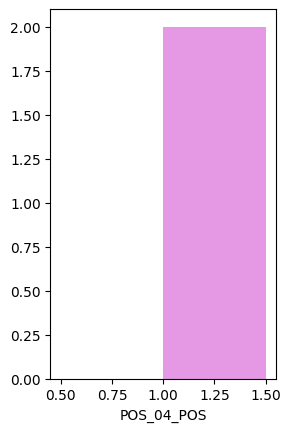

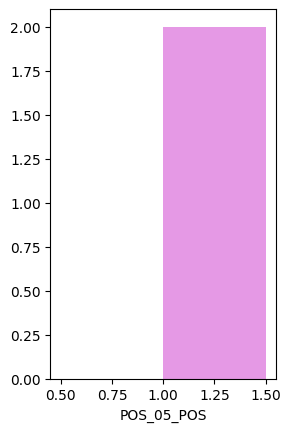

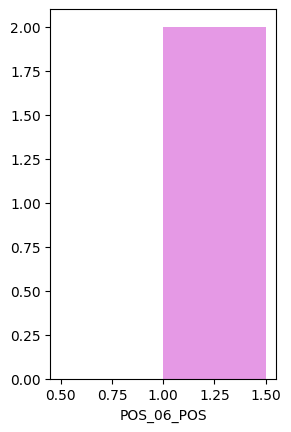

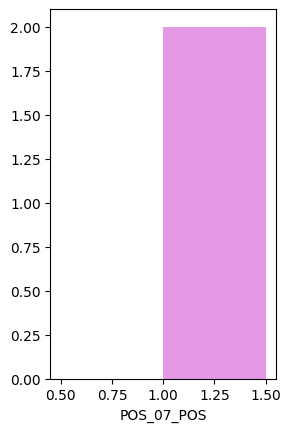

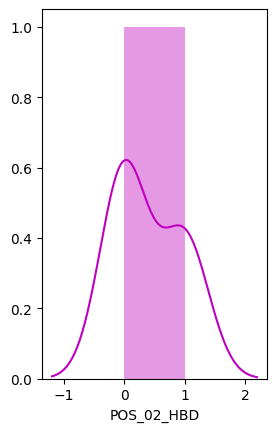

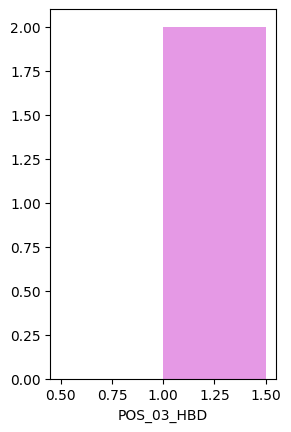

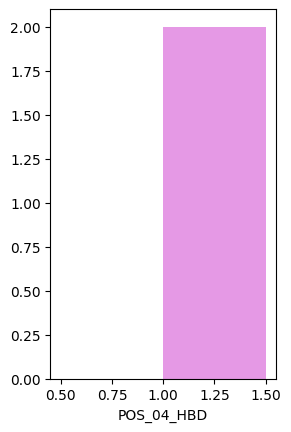

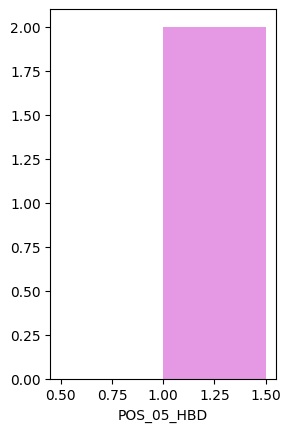

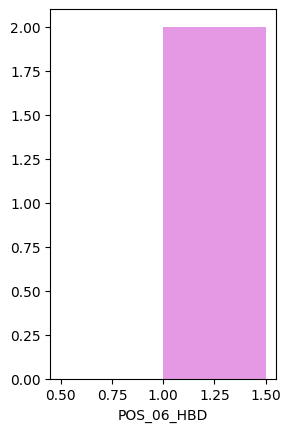

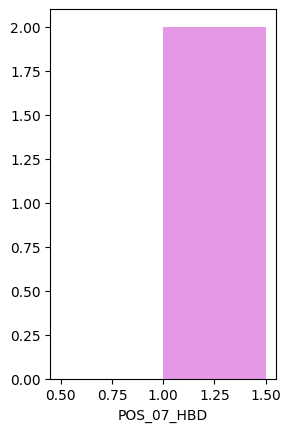

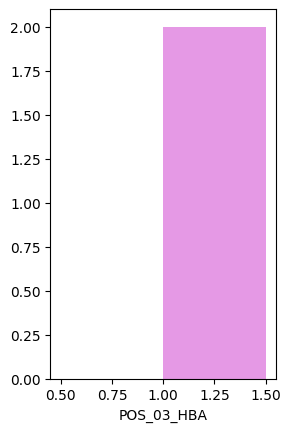

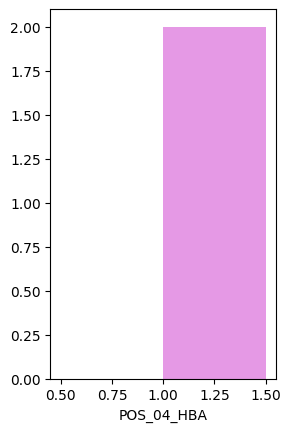

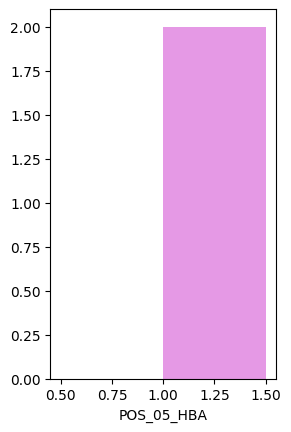

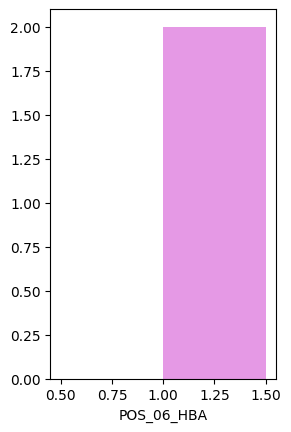

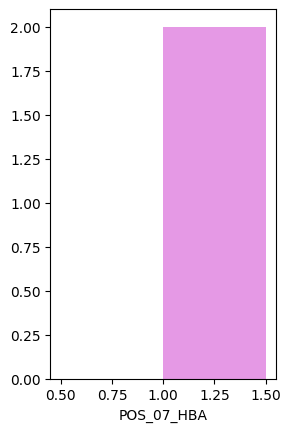

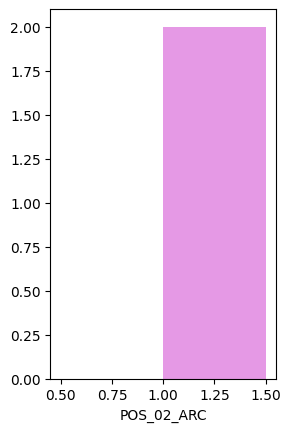

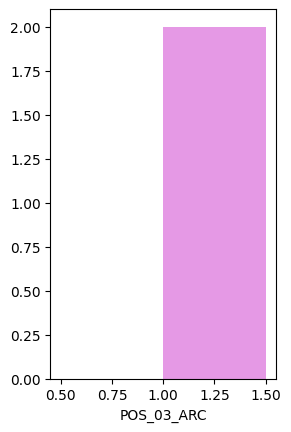

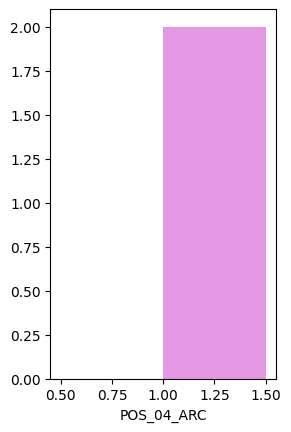

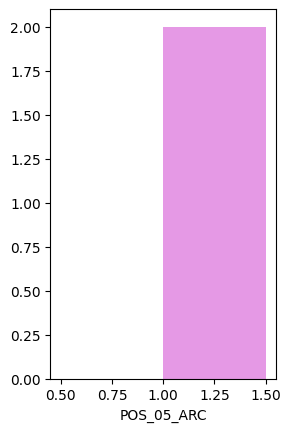

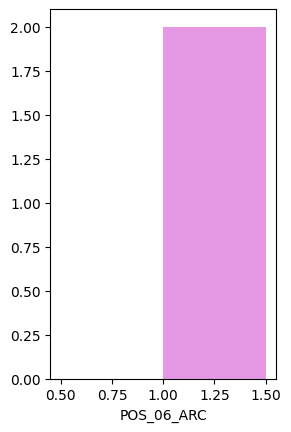

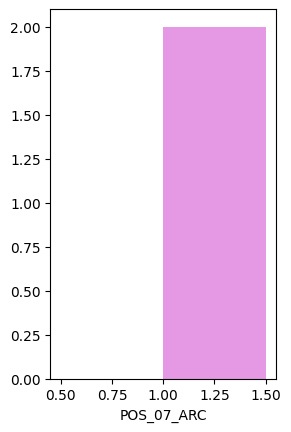

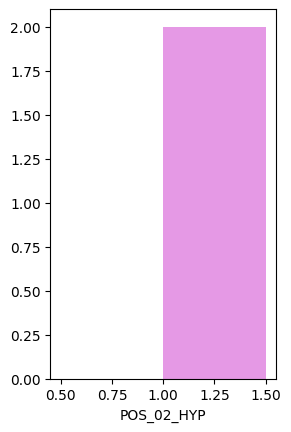

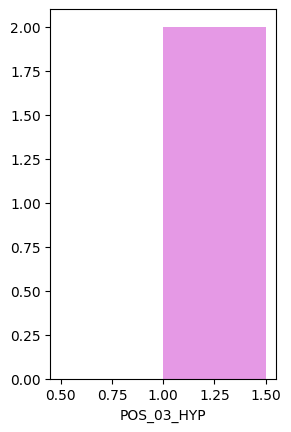

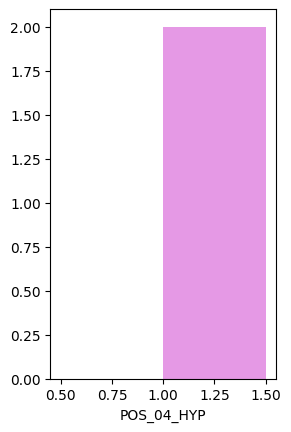

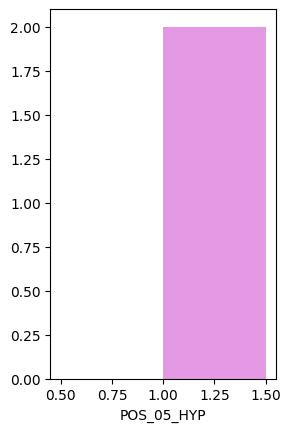

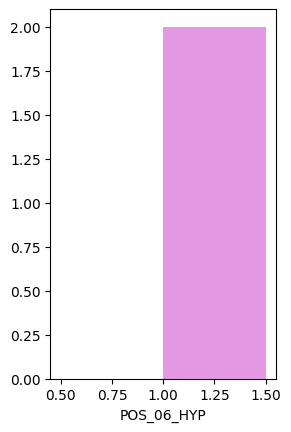

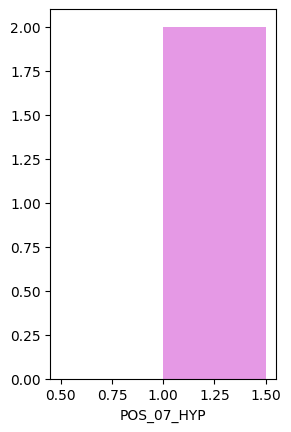

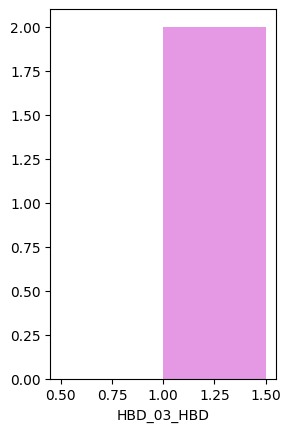

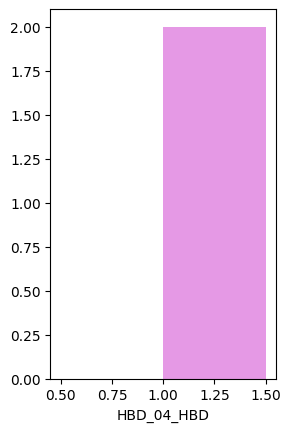

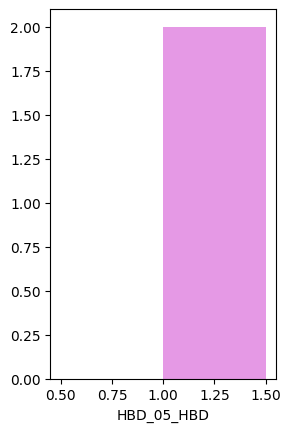

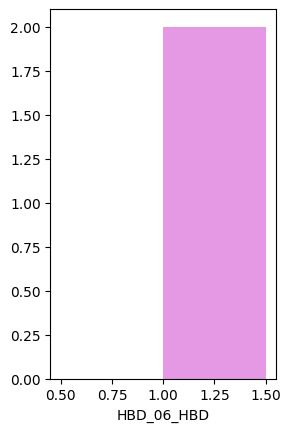

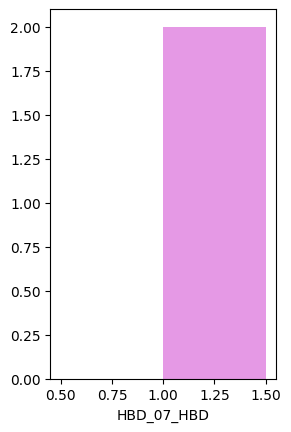

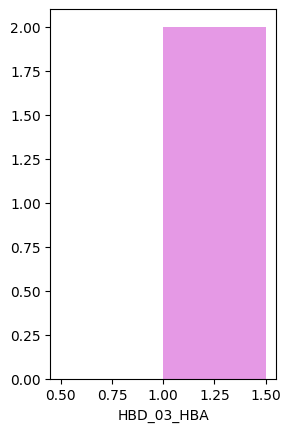

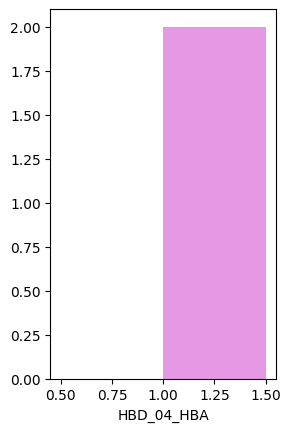

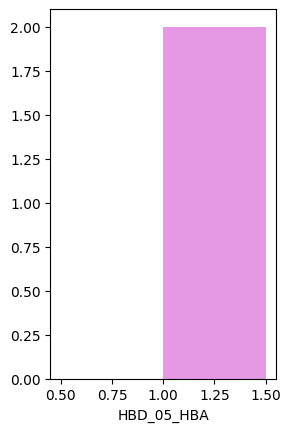

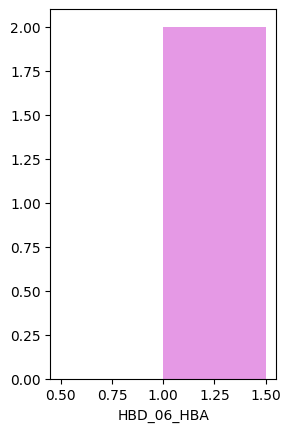

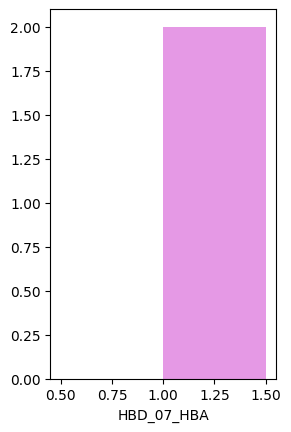

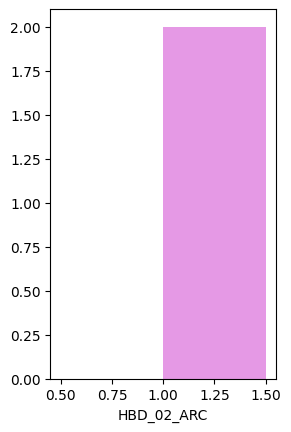

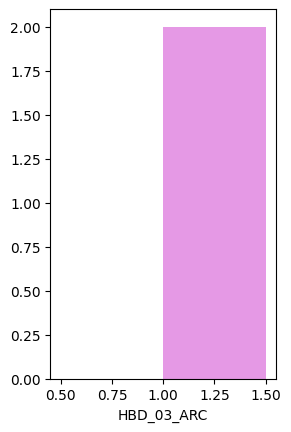

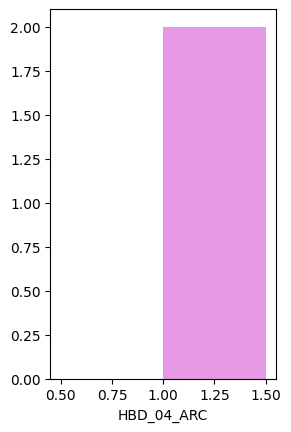

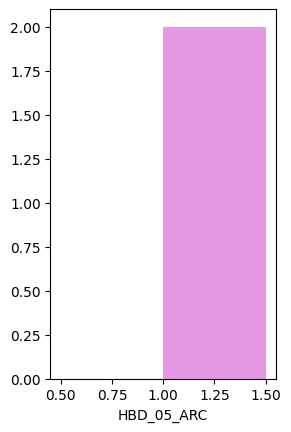

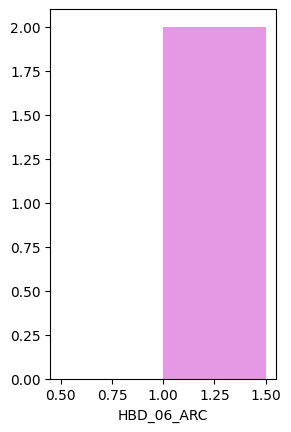

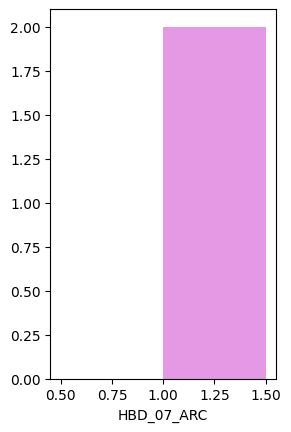

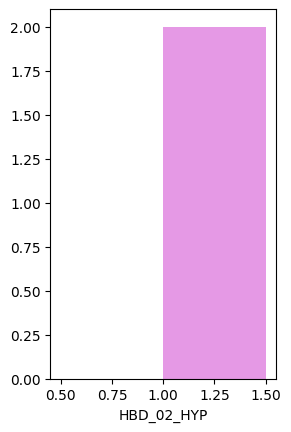

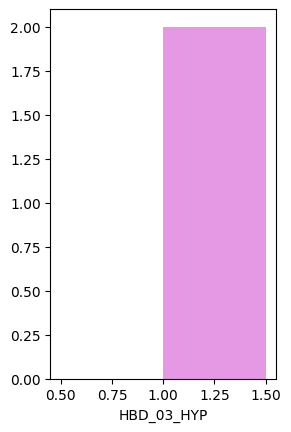

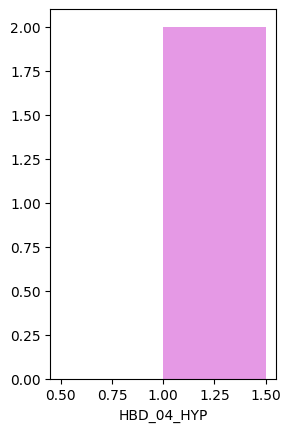

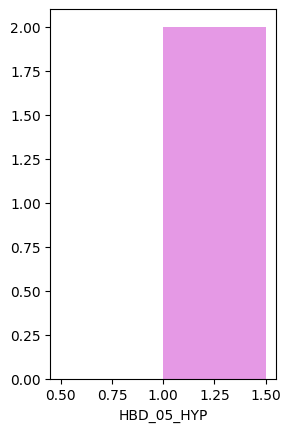

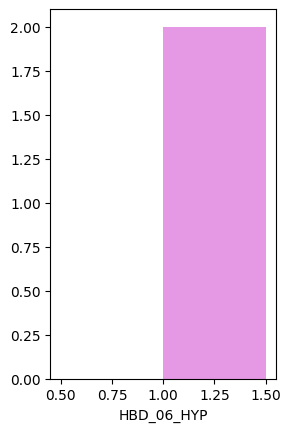

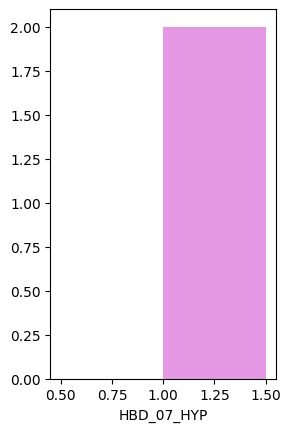

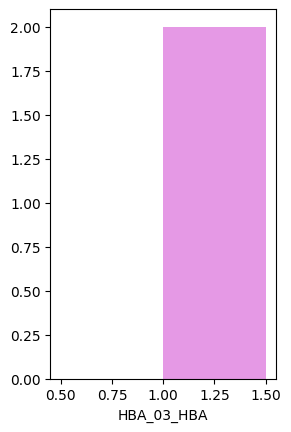

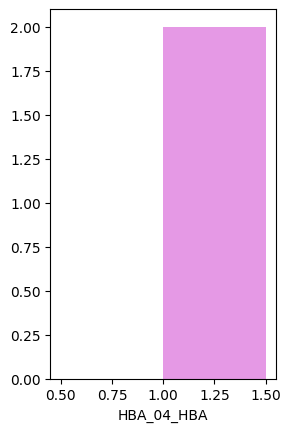

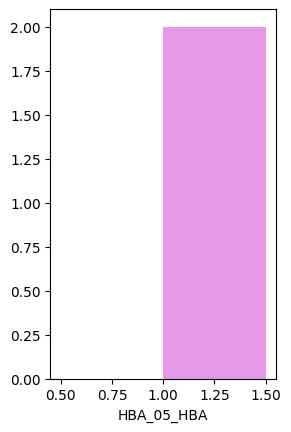

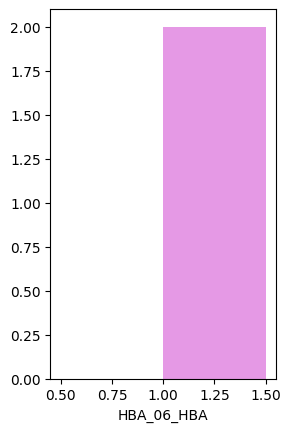

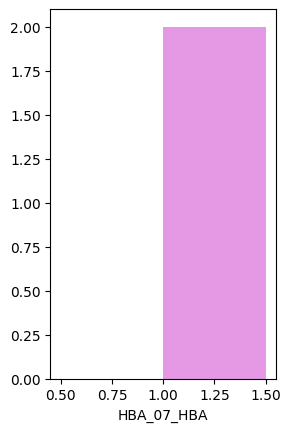

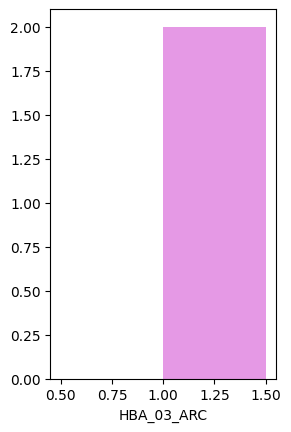

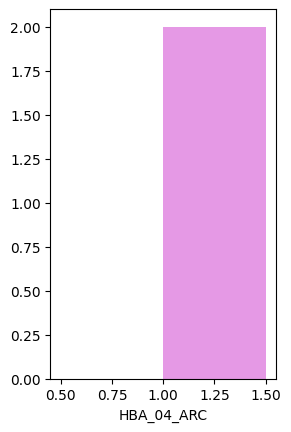

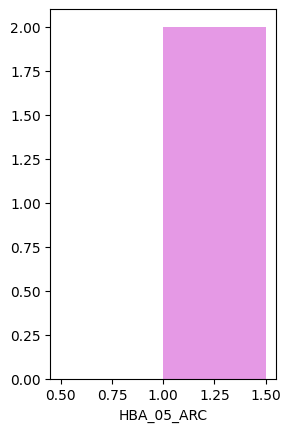

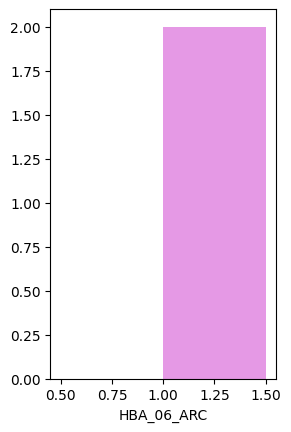

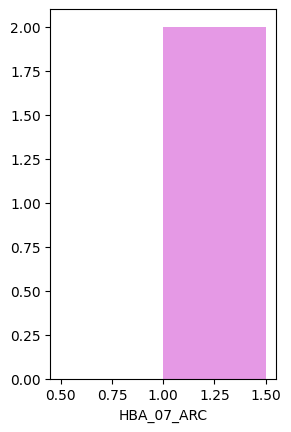

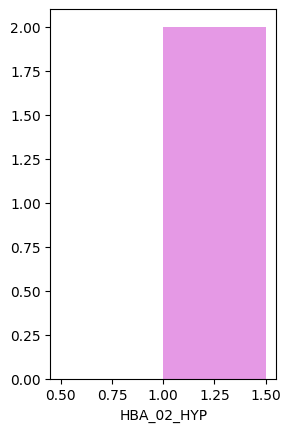

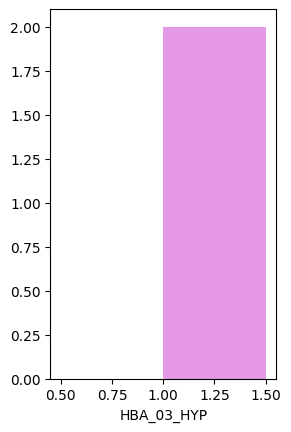

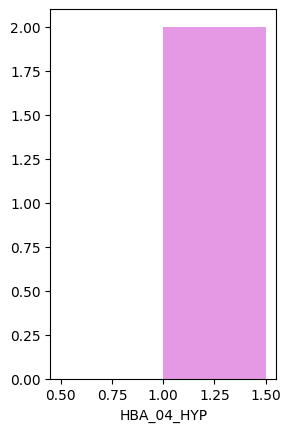

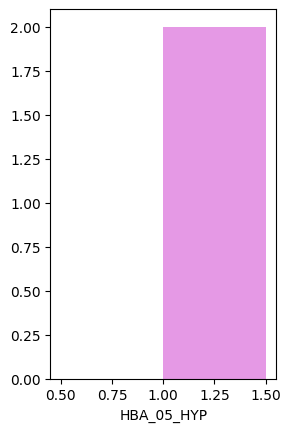

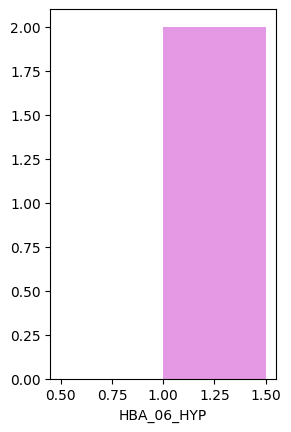

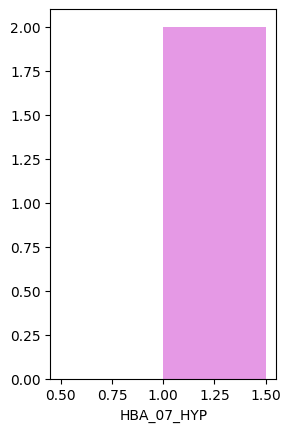

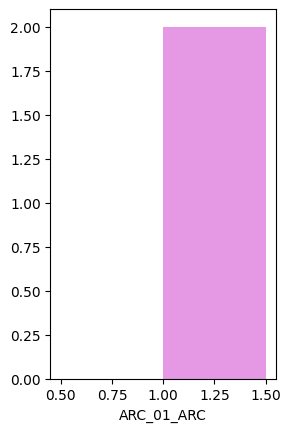

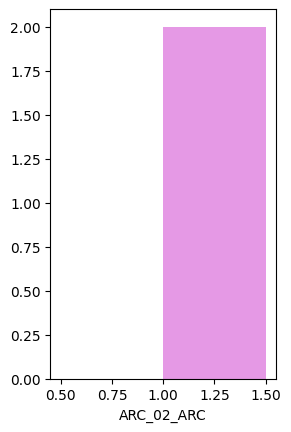

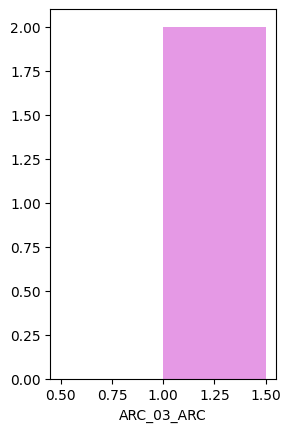

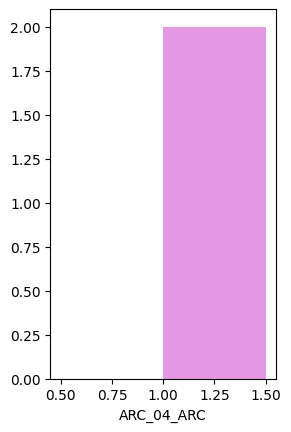

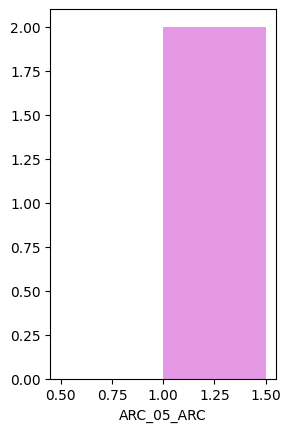

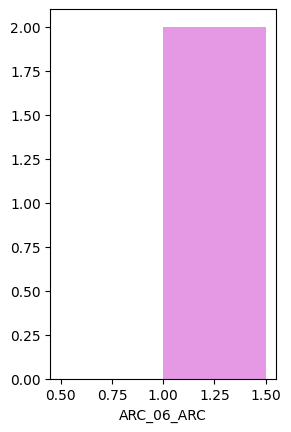

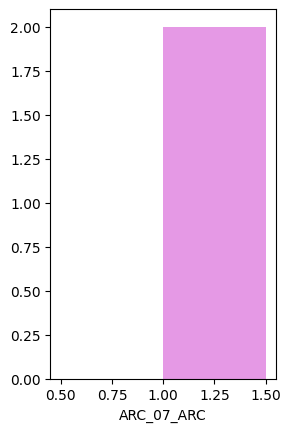

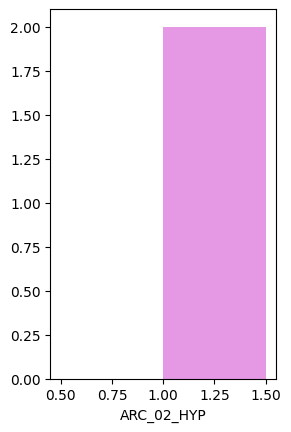

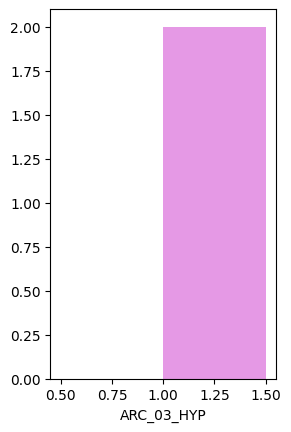

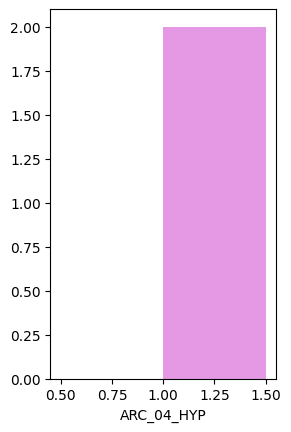

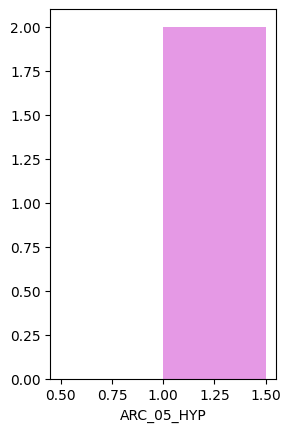

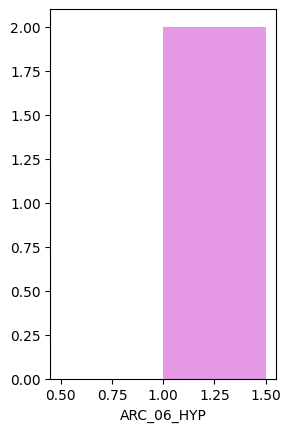

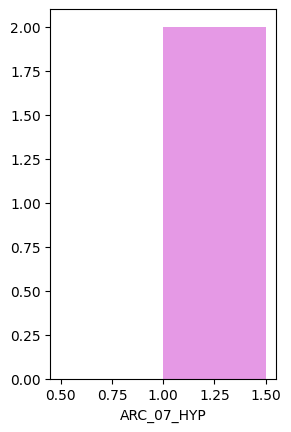

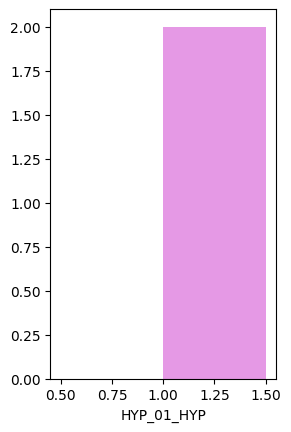

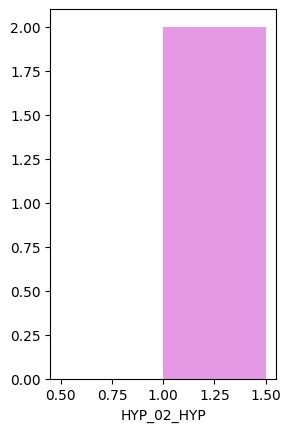

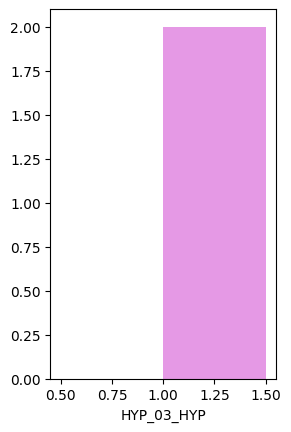

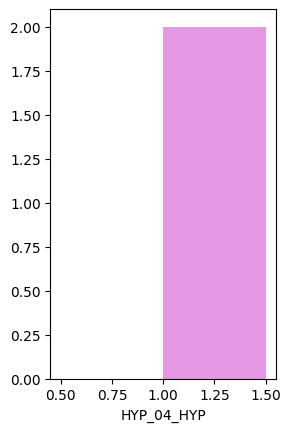

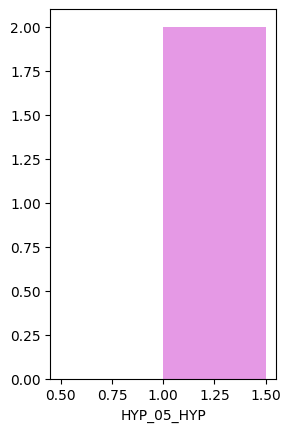

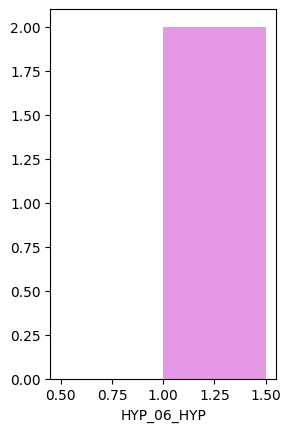

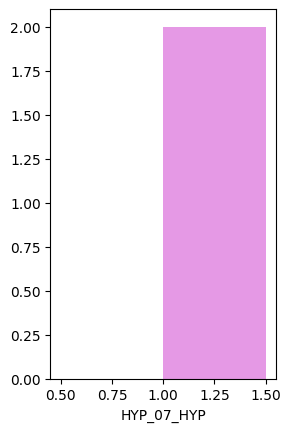

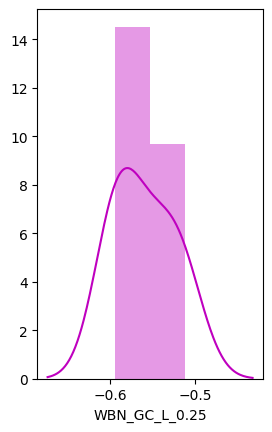

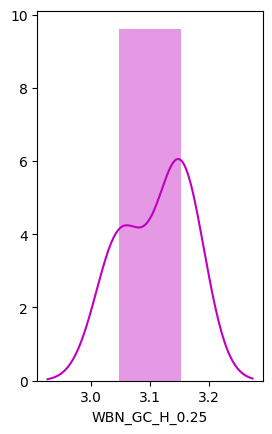

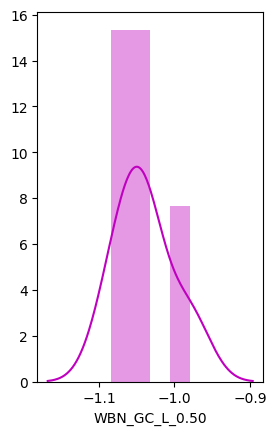

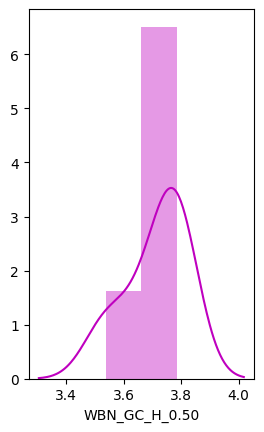

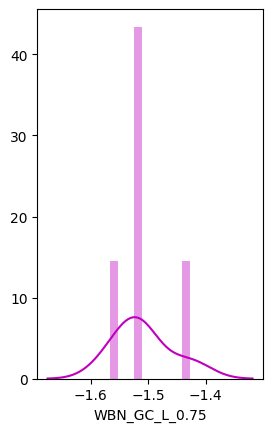

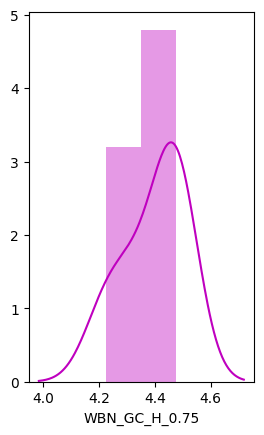

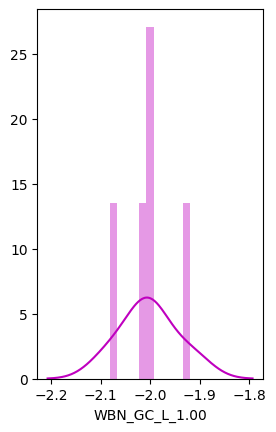

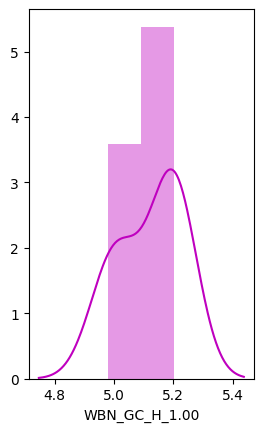

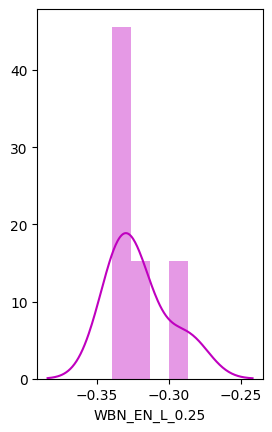

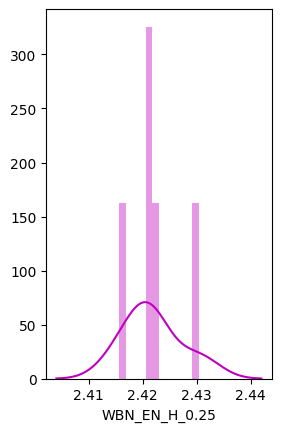

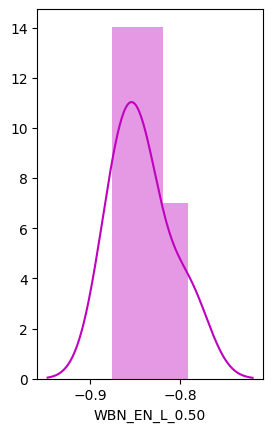

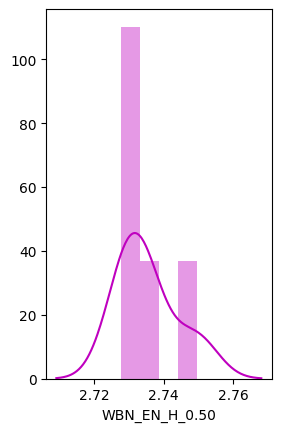

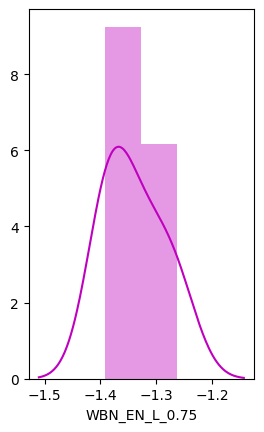

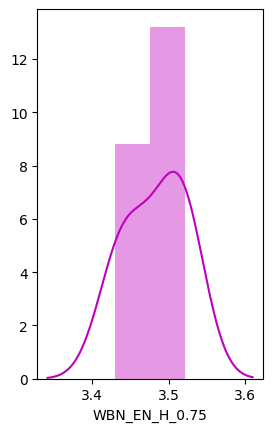

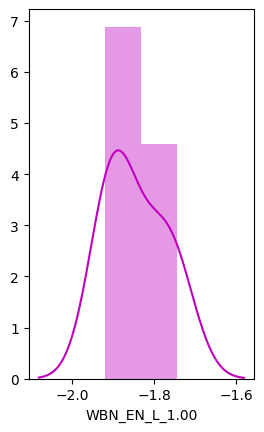

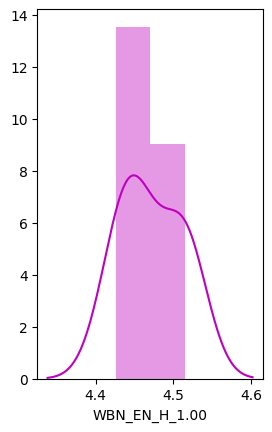

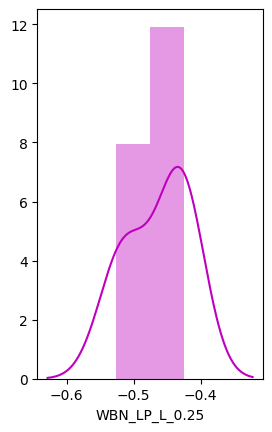

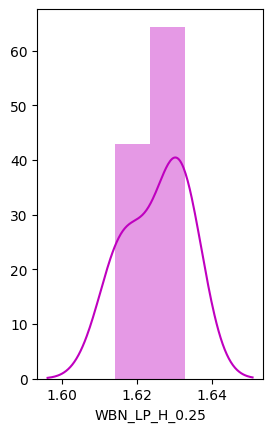

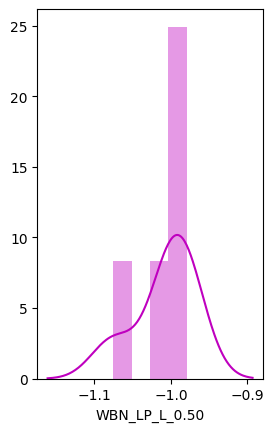

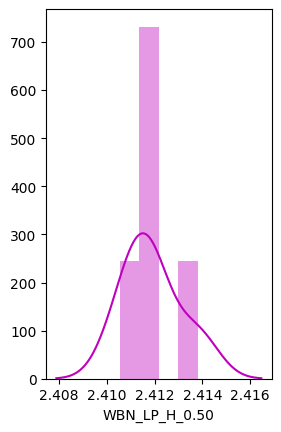

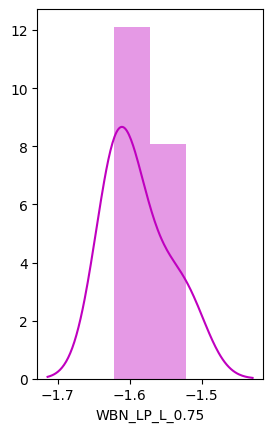

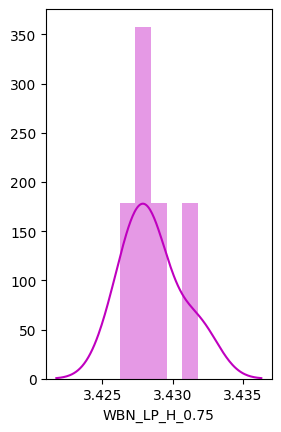

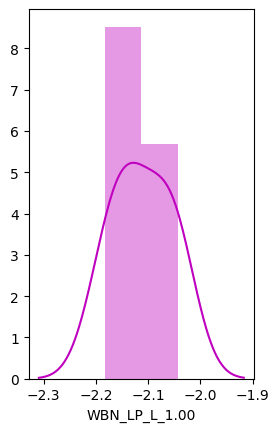

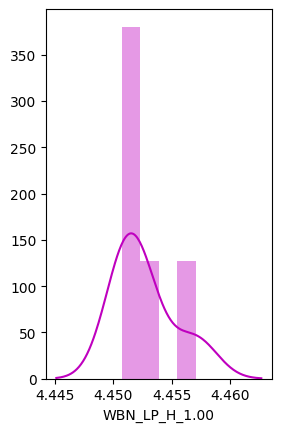

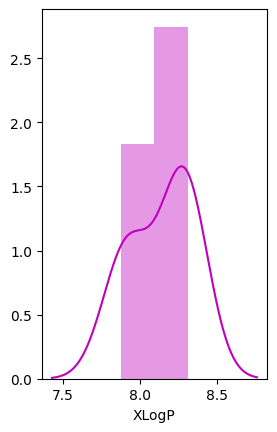

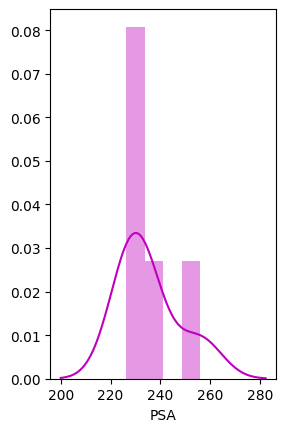

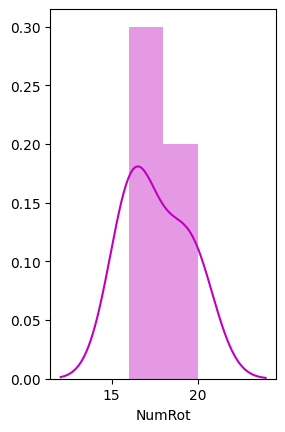

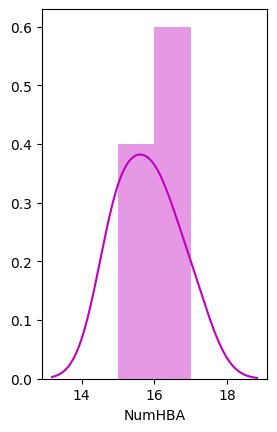

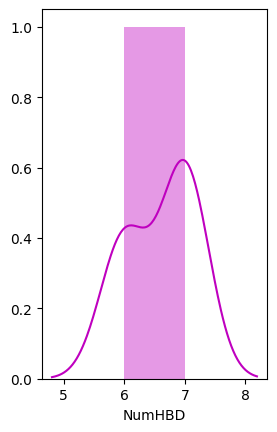

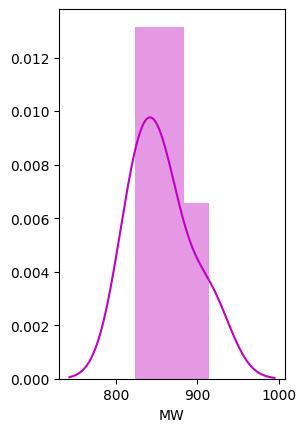

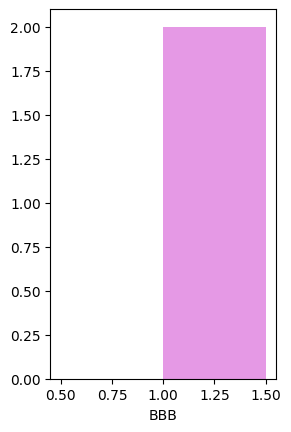

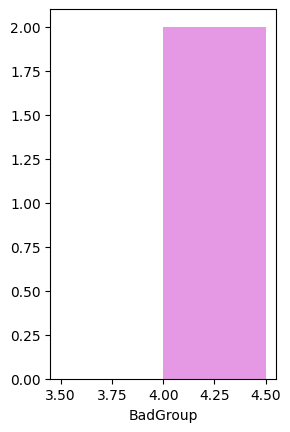

In [ ]:
#Box plot with distplot
numeric_features =df.describe().columns
numeric_features

for var in numeric_features:
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
    fig.set_ylabel('')
    fig.set_xlabel(var)

    plt.show()

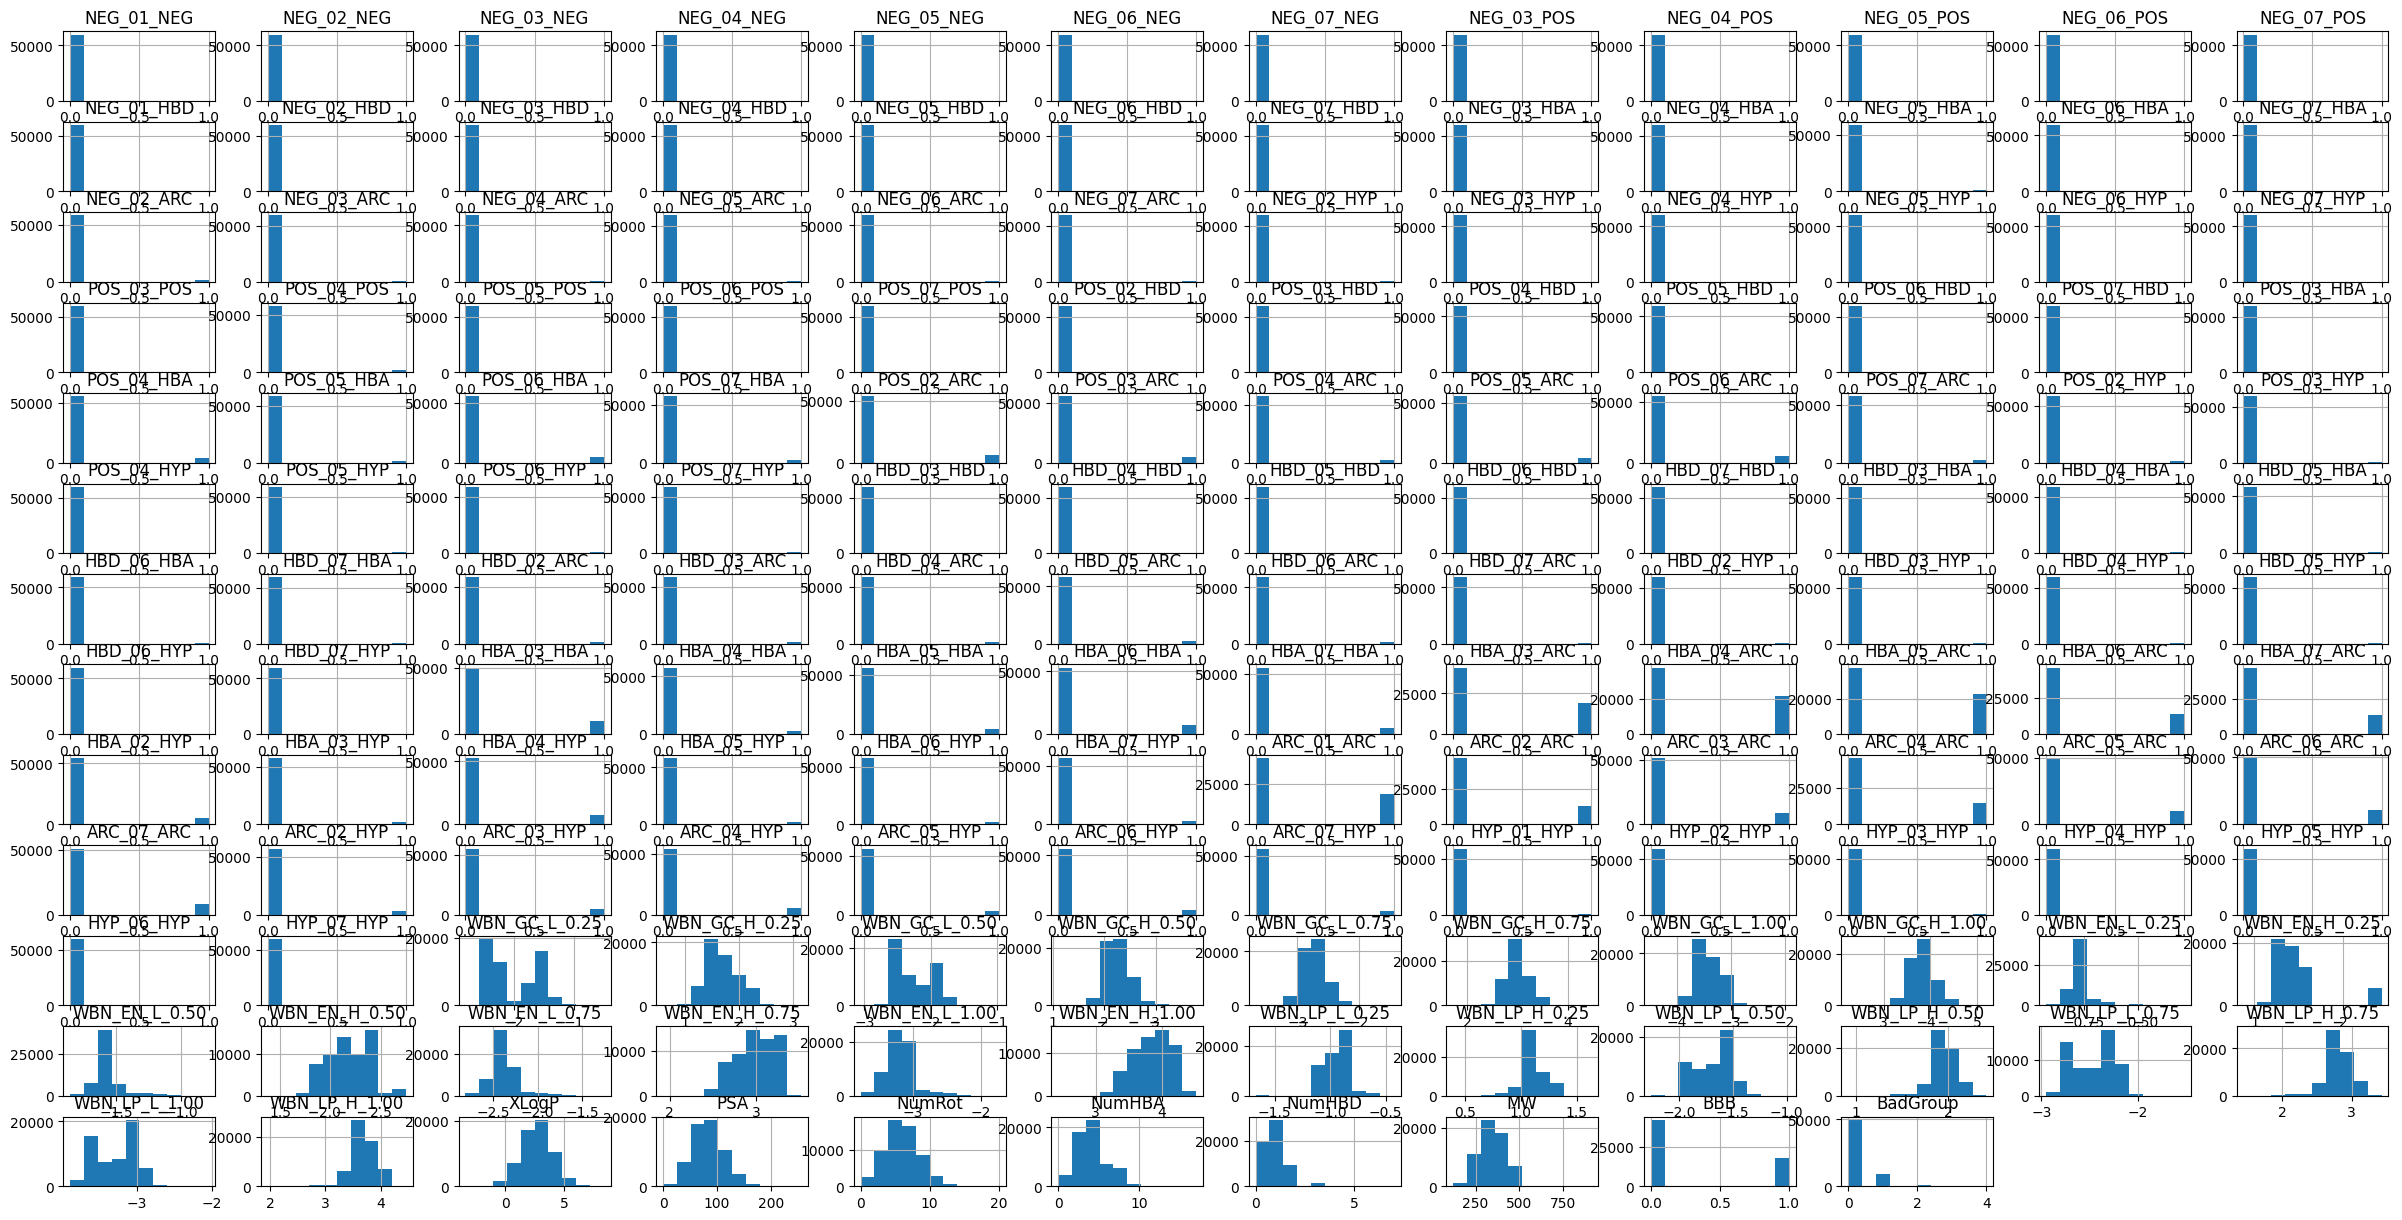

In [ ]:
z=df.hist(figsize=(30,15))

In [ ]:
# cols = df.sum().sort_values(ascending=False)[-10:]
# df[cols].boxplot(figsize=(20,15))
# plt.show()

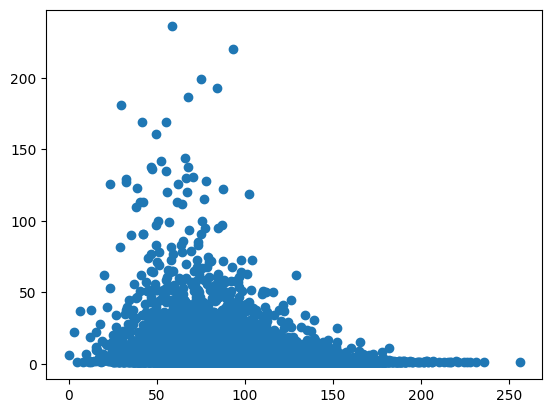

In [ ]:
a=df.groupby("PSA").size()
plt.scatter(a.index,a.values)
plt.show()

In [ ]:
df.dtypes.sort_values()[-30:]

POS_06_HBD         int64
POS_07_POS         int64
WBN_LP_L_0.50    float64
WBN_LP_H_0.50    float64
WBN_LP_L_0.75    float64
WBN_LP_H_0.75    float64
XLogP            float64
WBN_LP_H_1.00    float64
PSA              float64
WBN_LP_H_0.25    float64
MW               float64
WBN_LP_L_1.00    float64
WBN_LP_L_0.25    float64
WBN_GC_H_0.50    float64
WBN_EN_L_1.00    float64
WBN_EN_H_0.75    float64
WBN_EN_L_0.75    float64
WBN_EN_H_0.50    float64
WBN_EN_L_0.50    float64
WBN_EN_H_0.25    float64
WBN_EN_L_0.25    float64
WBN_GC_H_1.00    float64
WBN_GC_L_1.00    float64
WBN_GC_H_0.75    float64
WBN_GC_L_0.75    float64
WBN_GC_L_0.50    float64
WBN_GC_H_0.25    float64
WBN_GC_L_0.25    float64
WBN_EN_H_1.00    float64
Outcome           object
dtype: object

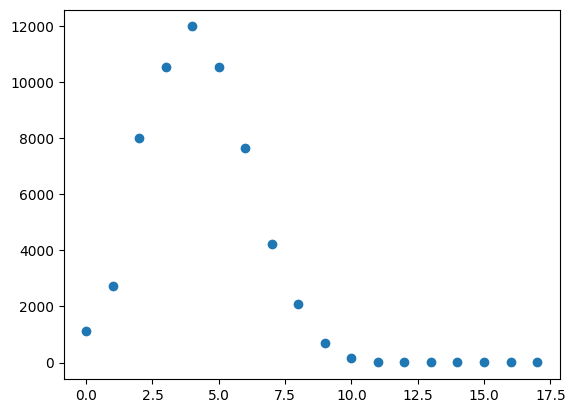

In [ ]:
a=df.groupby("NumHBA").size()
plt.scatter(a.index,a.values)
plt.show()

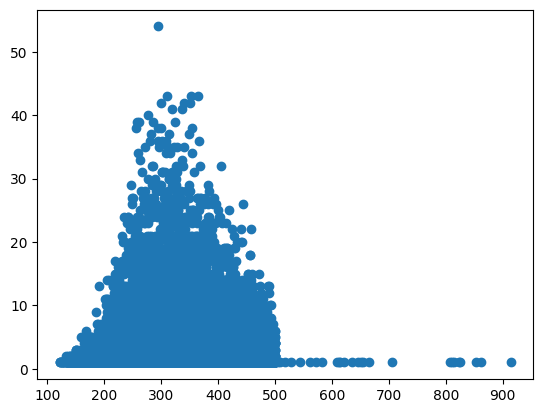

In [ ]:
a=df.groupby("MW").size()
plt.scatter(a.index,a.values)
plt.show()

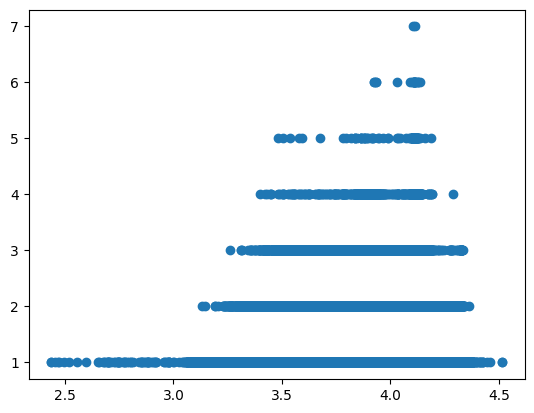

In [ ]:
a=df.groupby("WBN_EN_H_1.00").size()
plt.scatter(a.index,a.values)
plt.show()

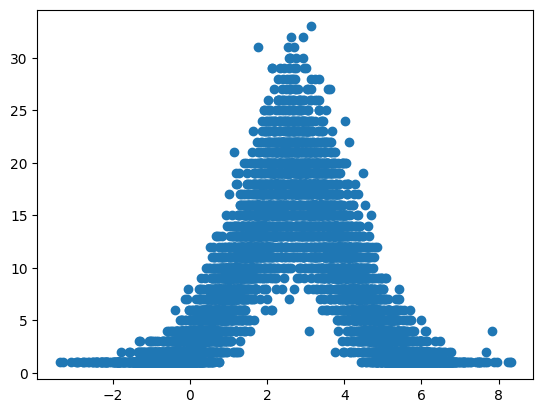

In [ ]:
a=df.groupby("XLogP").size()
plt.scatter(a.index,a.values)
plt.show()

In [ ]:
X_smote=y_sample.value_counts()
type(X_smote)

pandas.core.series.Series

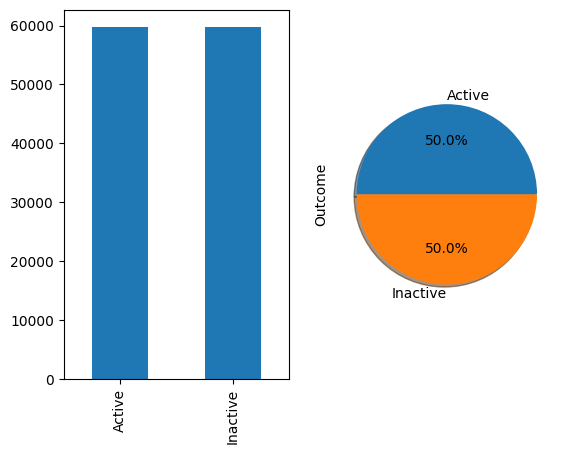

In [ ]:
plt.subplot(121)
y_sample.value_counts().plot(kind="bar")
plt.subplot(122)
y_sample.value_counts().plot(kind="pie",autopct='%1.1f%%',shadow=True)
plt.show()

In [ ]:
X_sample1=X_sample.copy()
y_sample1=y_sample.copy()

In [ ]:
from sklearn import preprocessing
scalar=preprocessing.StandardScaler()
scaling_data=scalar.fit_transform(X_sample1)

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=None)
x1_pca=pca.fit(scaling_data)
x1_pca=pca.transform(scaling_data)
PC_components_none = np.arange(pca.n_components_)
PC_components_none = np.arange(pca.n_components_)

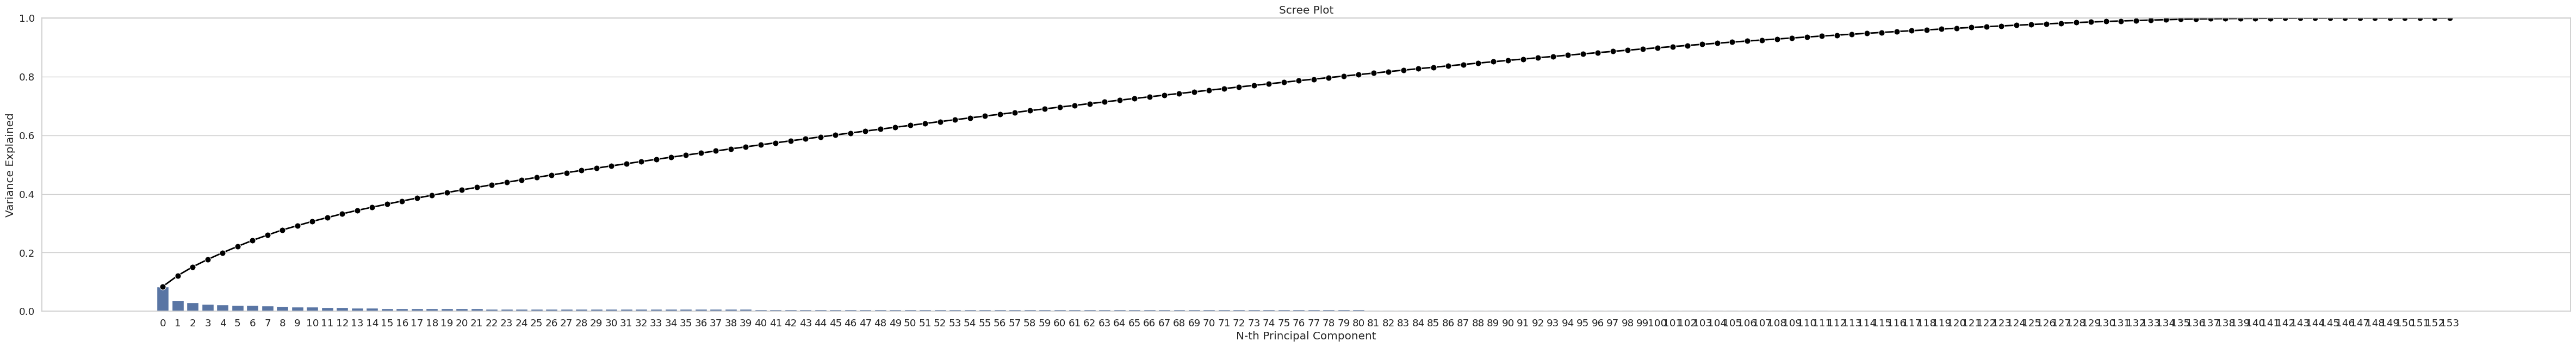

In [ ]:
# Scree Plot
_ = sns.set(style='whitegrid', font_scale=1.2)
fig, ax = plt.subplots(figsize=(60, 7))
_ = sns.barplot(x=PC_components_none, y=pca.explained_variance_ratio_, color='b')
_ = sns.lineplot(x=PC_components_none, y=np.cumsum(pca.explained_variance_ratio_), color='black', linestyle='-', linewidth=2, marker='o', markersize=8)

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

In [ ]:
x1_pca.shape

(119454, 154)

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=100)
x_pca=pca.fit(scaling_data)
x_pca=pca.transform(scaling_data)
PC_components = np.arange(pca.n_components_)
PC_components = np.arange(pca.n_components_)

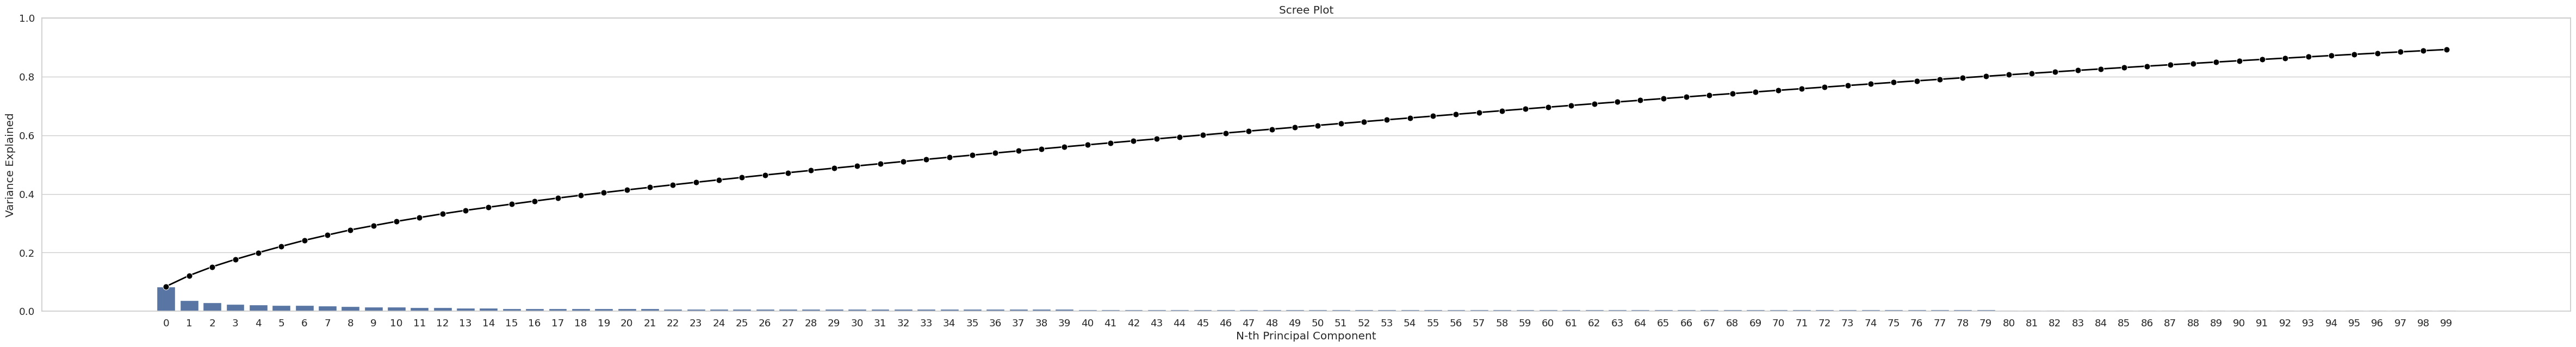

In [ ]:
# Scree Plot
_ = sns.set(style='whitegrid', font_scale=1.2)
fig, ax = plt.subplots(figsize=(60, 7))
_ = sns.barplot(x=PC_components, y=pca.explained_variance_ratio_, color='b')
_ = sns.lineplot(x=PC_components, y=np.cumsum(pca.explained_variance_ratio_), color='black', linestyle='-', linewidth=2, marker='o', markersize=8)

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x_pca,y_sample1,test_size=0.20,random_state=0)

In [ ]:
X1_train,X1_test,y1_train,y1_test=train_test_split(x1_pca,y_sample1,test_size=0.20,random_state=0)

**Logistic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [ ]:
lr.fit(X_train,y_train)
y_pred_train1=lr.predict(X_train)
y_pred_test1=lr.predict(X_test)

In [ ]:
print("accuracy_score",accuracy_score(y_train,y_pred_train1))
print("accuracy_score",accuracy_score(y_test,y_pred_test1))

accuracy_score 0.9362200851794105
accuracy_score 0.9381356996358461


In [ ]:
print(classification_report(y_test,y_pred_test1))

              precision    recall  f1-score   support

      Active       0.92      0.96      0.94     12030
    Inactive       0.96      0.91      0.94     11861

    accuracy                           0.94     23891
   macro avg       0.94      0.94      0.94     23891
weighted avg       0.94      0.94      0.94     23891



In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred_test1))

[[11566   464]
 [ 1014 10847]]


**Linear Regression**

In [ ]:
lr.fit(X1_train,y1_train)
y1_pred_train=lr.predict(X1_train)
y1_pred_test=lr.predict(X1_test)

In [ ]:
print("accuracy_score",accuracy_score(y1_train,y1_pred_train))
print("accuracy_score",accuracy_score(y1_test,y1_pred_test))

accuracy_score 0.9599007984261692
accuracy_score 0.9591059394751161


In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=100)
x_rf_pca=pca.fit(scaling_data)
x_rf_pca=pca.transform(scaling_data)
PC_components = np.arange(pca.n_components_)
PC_components = np.arange(pca.n_components_)

In [ ]:
X2_train,X2_test,y2_train,y2_test=train_test_split(x_rf_pca,y_sample,test_size=0.20,random_state=0)

**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100,max_depth=5,oob_score=True,random_state=0)
from sklearn.datasets import make_classification

In [ ]:
rfc.fit(X2_train,y2_train)
y2_pred_train2=rfc.predict(X2_train)
y2_pred_test2=rfc.predict(X2_test)

In [ ]:
print(accuracy_score(y2_train,y2_pred_train2))
print(accuracy_score(y2_test,y2_pred_test2))

0.9624959450833481
0.9608639236532586


In [ ]:
print(confusion_matrix(y_test,y2_pred_test2))

[[11940    90]
 [  845 11016]]


In [ ]:
print(classification_report(y_test,y2_pred_test2))

              precision    recall  f1-score   support

      Active       0.93      0.99      0.96     12030
    Inactive       0.99      0.93      0.96     11861

    accuracy                           0.96     23891
   macro avg       0.96      0.96      0.96     23891
weighted avg       0.96      0.96      0.96     23891



In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=None)
x_pca=pca.fit(scaling_data)
x_pca=pca.transform(scaling_data)
PC_components = np.arange(pca.n_components_)
PC_components = np.arange(pca.n_components_)

In [ ]:
X2_train,X2_test,y2_train,y2_test=train_test_split(x_pca,y_sample,test_size=0.20,random_state=0)

In [ ]:
rfc.fit(X2_train,y2_train)
y2_pred_train2=rfc.predict(X2_train)
y2_pred_test2=rfc.predict(X2_test)

In [ ]:
print(accuracy_score(y2_train,y2_pred_train2))
print(accuracy_score(y2_test,y2_pred_test2))

0.9661270575431914
0.9673517224059269


**Decision Tress Clasifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_train3=dt.predict(X_train)
y_pred_test3=dt.predict(X_test)

In [ ]:
print(accuracy_score(y_train,y_pred_train3))
print(accuracy_score(y_test,y_pred_test3))

1.0
0.9964421748775689


In [ ]:
print(confusion_matrix(y_test,y_pred_test3))

[[12017    13]
 [   72 11789]]


In [ ]:
print(classification_report(y_test,y_pred_test3))

              precision    recall  f1-score   support

      Active       0.99      1.00      1.00     12030
    Inactive       1.00      0.99      1.00     11861

    accuracy                           1.00     23891
   macro avg       1.00      1.00      1.00     23891
weighted avg       1.00      1.00      1.00     23891



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=100,max_depth=5,oob_score=True,random_state=0)

In [ ]:
rfc.fit(X_train,y_train)
y_pred_train=rfc.predict(X_train)
y_pred_test=rfc.predict(X_test)

In [ ]:
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred_test))

0.9634377321766793
0.9623707672345234


In [ ]:
rfc.fit(X1_train,y1_train)
y1_pred_train=rfc.predict(X1_train)
y1_pred_test=rfc.predict(X1_test)

In [ ]:
print(accuracy_score(y1_train,y1_pred_train))
print(accuracy_score(y1_test,y1_pred_test))

0.9661270575431914
0.9673517224059269


In [ ]:
from sklearn.linear_model import LogisticRegression
modelLogistic = LogisticRegression()
modelLogistic.fit(X_train,y_train)

LogisticRegression()

In [ ]:
from sklearn.svm import SVC
# Building a Support Vector Machine on train data
svc_model = SVC(C=.4, kernel='linear', gamma=2)
svc_model.fit(X_train, y_train)

In [ ]:
y_pred_train4= modelLogistic.predict(X_train)
y_pred_test4=modelLogistic.predict(X_test)
# check the accuracy on the training set
print(modelLogistic.score(X_train,y_train))
print(modelLogistic.score(X_test,y_test))

0.9362200851794105
0.9381356996358461


In [ ]:
print(confusion_matrix(y_test,y_pred_test4))

[[11566   464]
 [ 1014 10847]]


In [ ]:
print(classification_report(y_test,y_pred_test4))

              precision    recall  f1-score   support

      Active       0.92      0.96      0.94     12030
    Inactive       0.96      0.91      0.94     11861

    accuracy                           0.94     23891
   macro avg       0.94      0.94      0.94     23891
weighted avg       0.94      0.94      0.94     23891



**AdaBoost Classifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf=AdaBoostClassifier(random_state=20)
clf.fit(X_train,y_train)

AdaBoostClassifier(random_state=20)

In [ ]:
y_pred_train5=clf.predict(X_train)
y_pred_test5=clf.predict(X_test)

In [ ]:
clf.score(X_test,y_test)

0.9684399983257294

In [ ]:
clf.score(X_train,y_train)

0.9682303820516308

In [ ]:
print(confusion_matrix(y_test,y_pred_test5))

[[11758   272]
 [  482 11379]]


In [ ]:
print(classification_report(y_test,y_pred_test5))

              precision    recall  f1-score   support

      Active       0.96      0.98      0.97     12030
    Inactive       0.98      0.96      0.97     11861

    accuracy                           0.97     23891
   macro avg       0.97      0.97      0.97     23891
weighted avg       0.97      0.97      0.97     23891



In [ ]:
residuals = y_train.values-str(y2_pred_train2)
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

TypeError: ignored

In [ ]:
pip install plotly

In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter(df, x="WBN_LP_H_1.00", y="Outcome")
fig.show()